In [1]:
import re
from itertools import product 
import string
import random
import numpy as np
from os import listdir
from os.path import isfile, join
from unidecode import unidecode
from tqdm import notebook as nb
from numpy import dot
from numpy.linalg import norm
from scipy import spatial
from math import sin, cos,pi,atan,sqrt,radians,degrees
import cmath
from copy import deepcopy
from tqdm.notebook import  tqdm

TR_D_HD,TR_L,TS_D_HD,TS_L=[],[],[],[]
d=10000
# alphabet = getAlphabet(d=d)
sim_input=0.05

randomSeed=int(1e9)+7

def similarity(lang_vector,text_vector):
    ### both similirity metrics are implemented
    diff_vec=[]
    for d_ in range(d):
        diff_vec.append(abs(lang_vector[d_]['polar']-text_vector[d_]['polar']))
    polarSimilarity=np.mean(diff_vec)
    a,b=[],[]
    for d_ in range(d):
        a.append(lang_vector[d_]['cartesian'])
        b.append(text_vector[d_]['cartesian'])
    cartesianSimilarity= np.vdot(b,a)/(norm(a)*norm(b))

    return {
        'polarSimilarity':polarSimilarity,
        'cartesianSimilarity':cartesianSimilarity.real
    }


def filterText(text):
    #Filter a given text to remove any punctuation and non latin characters
    text=text.lower()
    output_text = re.sub('[^a-z- ]+', '', text)
    output_text=output_text.replace('-','')
    return output_text

def rand_complex_array(d = 10000):
    ### generate a random complex array, cose+sinej
    hd_prev = 2 * np.pi * np.random.rand(1, d)[0] # random angles - base vector for fractional binding
    hd_prev = 1 * np.exp(1j * hd_prev) # create a phasor vector
    return hd_prev


    
def getAlphabet(d=10000):
    ### generate the alphabet
    alphabet = {} 
    keys = [i for i in string.ascii_lowercase]+[" "] 
    for i in keys:
        alphabet[i]=rand_complex_array(d=d)
    return alphabet

        
def emptyVector():
    ## Empty vector of 0+0j type.
    return np.array([complex(0,0) for d_ in range(d)])

def genTextVector(text,alphabet,sim_input,window=4,d=10000):
    text=filterText(text)
    ## generate text vector for a given text
    final = emptyVector()
    text = list(text)
#     print(text)
    flag_1=0
    for i in range(len(text)-window+1):
        cur = text[i:i+window]
        temp =emptyVector()
        flag=1;
        flag_0=0
        for j in range(1,window+1):
            arr = alphabet[cur[j-1]]
            for k in range(j-1):
                arr=np.roll(arr, 1)
#             arr=np.power(arr,sim_input*j)
            if flag == 1:
                temp=arr
                flag=0
            else:
                temp=temp*arr
#             bind(arr,temp)
#         superimpose(temp,final)
        final=final+temp
#     normalize(final)
    final = np.sqrt(d) * final / np.linalg.norm(final)
    return final

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.lines import Line2D  
# %matplotlib qt
def surf_plot(dist):
    fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (12, 8))

    X = np.arange(0, len(dist), 1)
    Y = np.arange(0, len(dist[0]), 1)
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X, Y, dist, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

    plt.gca().invert_yaxis()
    plt.show()
    
def level(x, q):
    lev = np.round(x * q)
    if(lev < q):
         lev += 1;
    return int(lev) - 1

def shp(a):
    print(a.shape)
    
def plot(mapp):
    # Supports upto 15 classes
    markers = [x[0] for x in list(Line2D.filled_markers)]
    fig = plt.figure()
    ax = fig.add_subplot()
    x = [-1, -1, 50, 50]
    y = [-1, 50, -1, 50]
    ax.scatter(x, y, marker = '.', color = 'none')
    for i in range(10):
        ind = np.argwhere(mapp == (i + 1))
        x = [t[0] for t in ind]
        y = [t[1] for t in ind]
        ax.scatter(x, y, marker = markers[i], label = str(i))
    
    plt.gcf().set_size_inches(8, 8)
    plt.show()

In [3]:
from scipy.spatial import distance

def cosineSimiliraty(a,b):
    return np.dot(a, np.conj(b))/(norm(a)*norm(b))

In [4]:
import pandas as pd
df_train = pd.read_csv('Data/reuters_8_class_train_final.txt')
df_test = pd.read_csv('Data/reuters_8_class_test_final.txt')

In [5]:
df_train.tail()

,text,class,label
5480,volcker urges quick aid to debtor nations fede...,tr,7
5481,volcker pushes spending cuts over trade bill f...,tr,7
5482,japan cuts chip supply may produce shortage ja...,tr,7
5483,u s urges surplus nations to boost growth lead...,tr,7
5484,canadians urge exemption from u s trade bill a...,tr,7


In [6]:
# import tensorflow as tf
# from keras.datasets import reuters 

# load and split data into training set and test set
(train_data, train_labels), (test_data, test_labels) =(df_train["text"].values,df_train["label"].values),(df_test["text"].values,df_test["label"].values)


In [7]:
# for i in range(len(train_data)):
#     if(train_labels[i]==0):
#         print(decode_text(train_data[i]))

## Train data

In [9]:
classCount=[0]*len(set(train_labels))
### these are the selected classes
selectedClasses =sorted(set(train_labels))# set([0,9,10,11,12,13,14,15,17]) # range(len(train_labels))  # set([0,12,17,32,36,40,43])
for i in range(len(train_data)):
    sentence = train_data[i]
#     if(classCount[train_labels[i]]>=100):
#         continue
    if(train_labels[i] not in selectedClasses ):
        continue
        
    TR_D_HD.append(genTextVector(sentence,alphabet,sim_input))
    TR_L.append(train_labels[i])
    classCount[train_labels[i]]+=1
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


In [11]:
selectedClasses

[0, 1, 2, 3, 4, 5, 6, 7]

In [12]:
classVectors=[0]*len(set(train_labels))
classVectorsDummy= [0]*len(set(train_labels))
for i in range(len(TR_D_HD)):
    
    
    c = TR_L[i]
    if(classVectorsDummy[c]==0):
        classVectorsDummy[c]=1
        classVectors[c]=TR_D_HD[i]
    else:
        classVectors[c]+=TR_D_HD[i]
        
    

In [5]:
### for saving the trained language vector to a file
import pickle
def save_obj(obj, name ):
    with open( 'obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle5.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)  

In [6]:
classVectors

NameError: name 'classVectors' is not defined

In [48]:
from collections import Counter
Counter(train_labels)

Counter({0: 1596, 1: 253, 2: 2840, 3: 41, 5: 190, 4: 206, 6: 108, 7: 251})

In [9]:
len(classVectors)

8

In [16]:
classVectorsdumy= []
for i in range(len(classVectors)):
    classVectorsdumy.append(classVectors[i])

In [17]:
# classVectors = load_obj("news_new_8_classes_item_vectors")
# classVectorsdumy
# save_obj(classVectors, "news_new_8_classes_item_vectors")
# save_obj(classVectorsdumy, "news_new_8_classes_item_vectors_dummy")
# save_obj(alphabet, "news_new_8_classes_item_alphabet")

In [6]:
# classVectors = load_obj("news_new_8_classes_item_vectors")
# classVectorsdumy = load_obj("news_new_8_classes_item_vectors_dummy")
# alphabet = load_obj("news_new_8_classes_item_alphabet")


classVectors = load_obj("news_new_8_classes_item_vectors_window_4")
classVectorsdumy = load_obj("news_new_8_classes_item_vectors_dummy_window_4")
alphabet = load_obj("news_new_8_classes_item_alphabet_window_4")

In [18]:
selectedClasses =sorted(set(train_labels))
selectedClasses

[0, 1, 2, 3, 4, 5, 6, 7]

In [19]:
 TR_D_HD[2]

array([ 0.24865762+0.95369179j,  0.85487591-0.18769027j,
        0.9404156 -0.73189039j, ..., -1.08876563+0.30231124j,
       -0.04385902+0.26233172j, -0.42715124-1.12389548j])

In [28]:
stat = np.zeros((len(set(train_labels)), len(set(train_labels))));
for i in range(len(TR_D_HD)):
    actual = TR_L[i]
    dist= 1-distance.cdist([TR_D_HD[i]],classVectorsdumy, 'cosine')
    maxi, bmu_ind = np.max(dist),  sorted(list(selectedClasses))[np.argmax(dist)]
    predicted= bmu_ind
    stat[actual][predicted]+=1

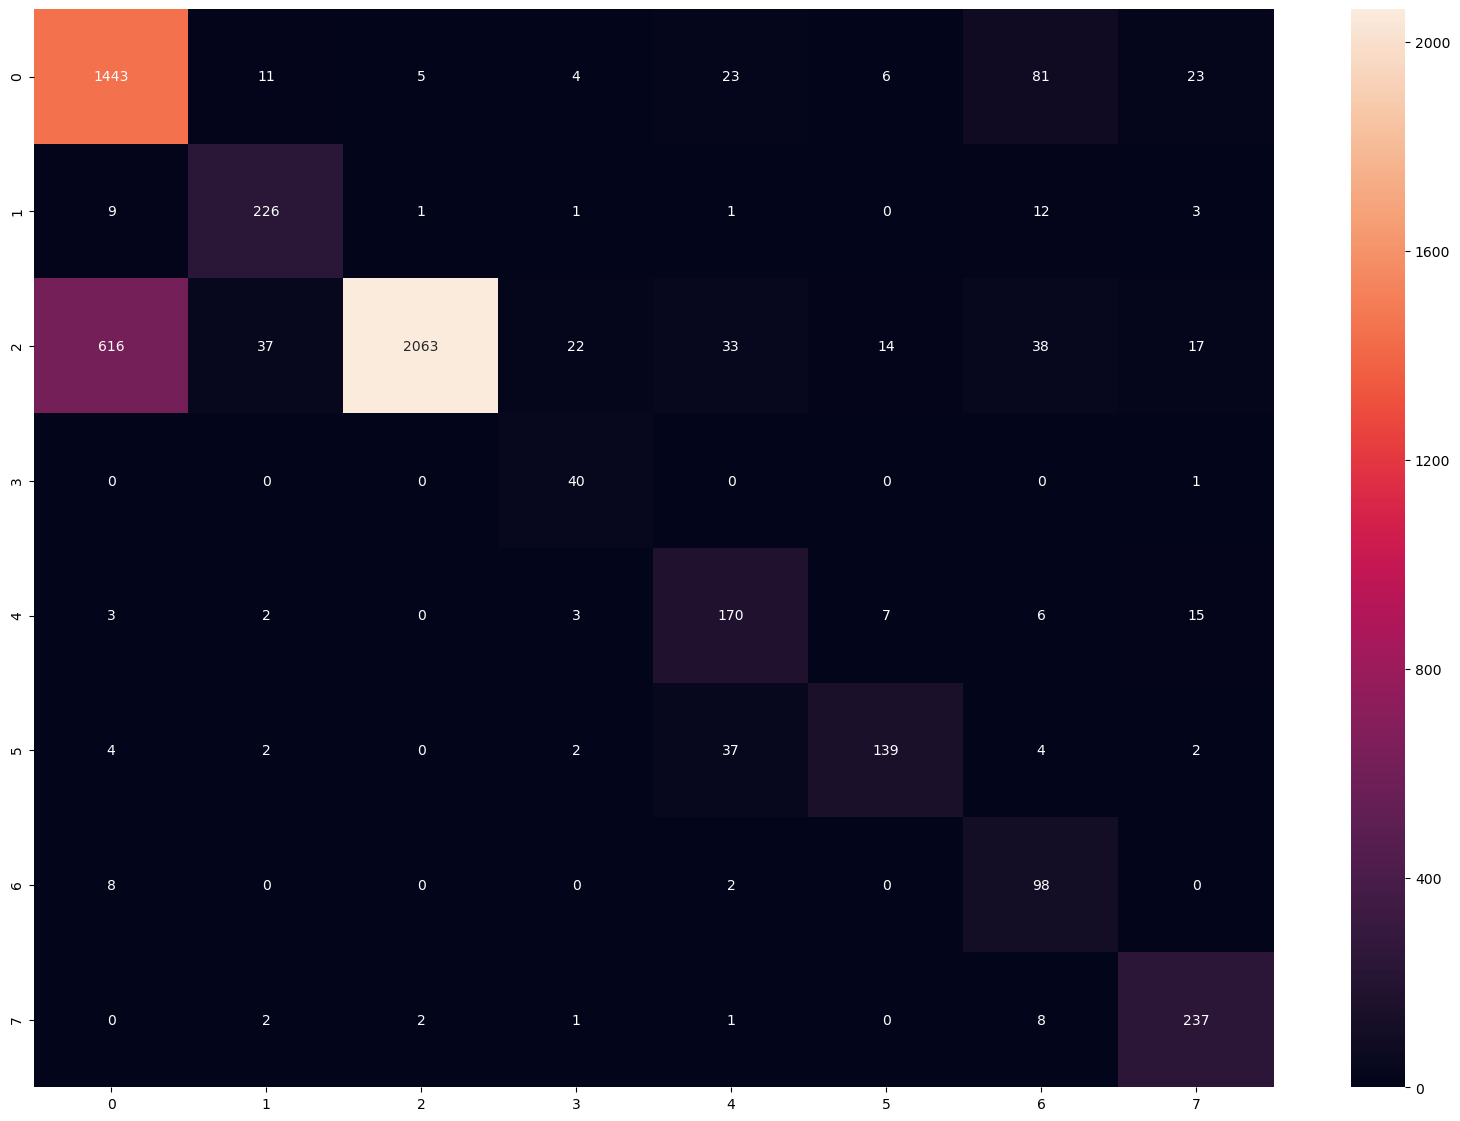

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(stat, index = [i for i in list(set(train_labels))],
                  columns = [i for i in list(set(train_labels))])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [22]:
## Compute accuracy
correct,all=0,0
for i in range(len(set(train_labels))):
    for j in range(len(set(train_labels))):
        if(i==j ):
            correct+=stat[i][j]
        all+=stat[i][j]
print(correct/all*100)

80.51048313582497


In [23]:
selectedClasses =sorted(set(train_labels))

## Test data

In [33]:
TS_D_HD,TS_L=[],[]
classCountTest=[0]*len(set(train_labels))
for i in range(len(test_data)):
    sentence = test_data[i]
#     if(classCountTest[test_labels[i]]>=20):
#         continue
    if(test_labels[i] not in selectedClasses ):
        continue    
    TS_D_HD.append(genTextVector(sentence,alphabetLoaded,sim_input,d=d))
    TS_L.append(test_labels[i])
    classCountTest[test_labels[i]]+=1
    print(i)
#     print(classCountTest)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [19]:
Counter(test_labels)

Counter({0: 696, 1: 121, 2: 1083, 3: 22, 5: 81, 4: 87, 6: 36, 7: 75})

In [47]:
def test(text):
    testFilteredText = genTextVector(text, alphabet, sim_input)
    dist= 1-distance.cdist([testFilteredText], classVectorsdumy, 'cosine')
    print(dist)
    maxi, bmu_ind = np.max(dist),  sorted(list(selectedClasses))[np.argmax(dist)]
    print(maxi)
    print(bmu_ind)
    predicted= bmu_ind
    return predicted

In [30]:
test_labels

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

In [48]:
### test for a individual sample



### Bulgarian text
#newText="120 хил. лв. бяха откраднати като на кино от обменно бюро близо до автогарата в Дулово, след като бандитите - двама маскирани мъже, проследили и нападнали служител, който пренасял в торба пари, съобщиха от прокуратурата."

### German text
# newText="Once we demonstrate that aspect of secrecy and we describes how Member State ministers even vote, then those ministers are detained burden back home in their Member States and bitterly national gens feel linkage to all lawsuit European."

newText = "blount inc blt th qtr net oper shr cts vs three cts oper net vs revs mln vs mln avg shrs mln vs mln year oper shr cts vs cts oper net vs revs billion vs billion avg shrs mln vs mln note prior year net excludes gains dlrs in quarter and dlrs in year from termination of overfunded pension plans backlog billion dlrs vs mln dlrs reuter"
### English text
#newText="A 1 Territory government would start, again using world’s best practice to deal with intractable, damaged and lost youth to turn them back into productive citizens and repay their victims for their crimes."


best,results=test(newText)
print("Best : ",best,results[best])
results

[[0.32718274 0.31379189 0.74679476 0.2956511  0.31498524 0.258027
  0.2860676  0.30826974]]
0.7467947567067997
2


TypeError: cannot unpack non-iterable numpy.int64 object

In [34]:
from scipy.spatial import distance
stat = np.zeros((len(set(test_labels)), len(set(test_labels))));
for i in range(len(TS_D_HD)):
    actual = TS_L[i]
    dist= 1-distance.cdist([TS_D_HD[i]], classVectorsdumy, 'cosine')
    maxi, bmu_ind = np.max(dist),  sorted(list(selectedClasses))[np.argmax(dist)]
    predicted= bmu_ind
    stat[actual][predicted]+=1

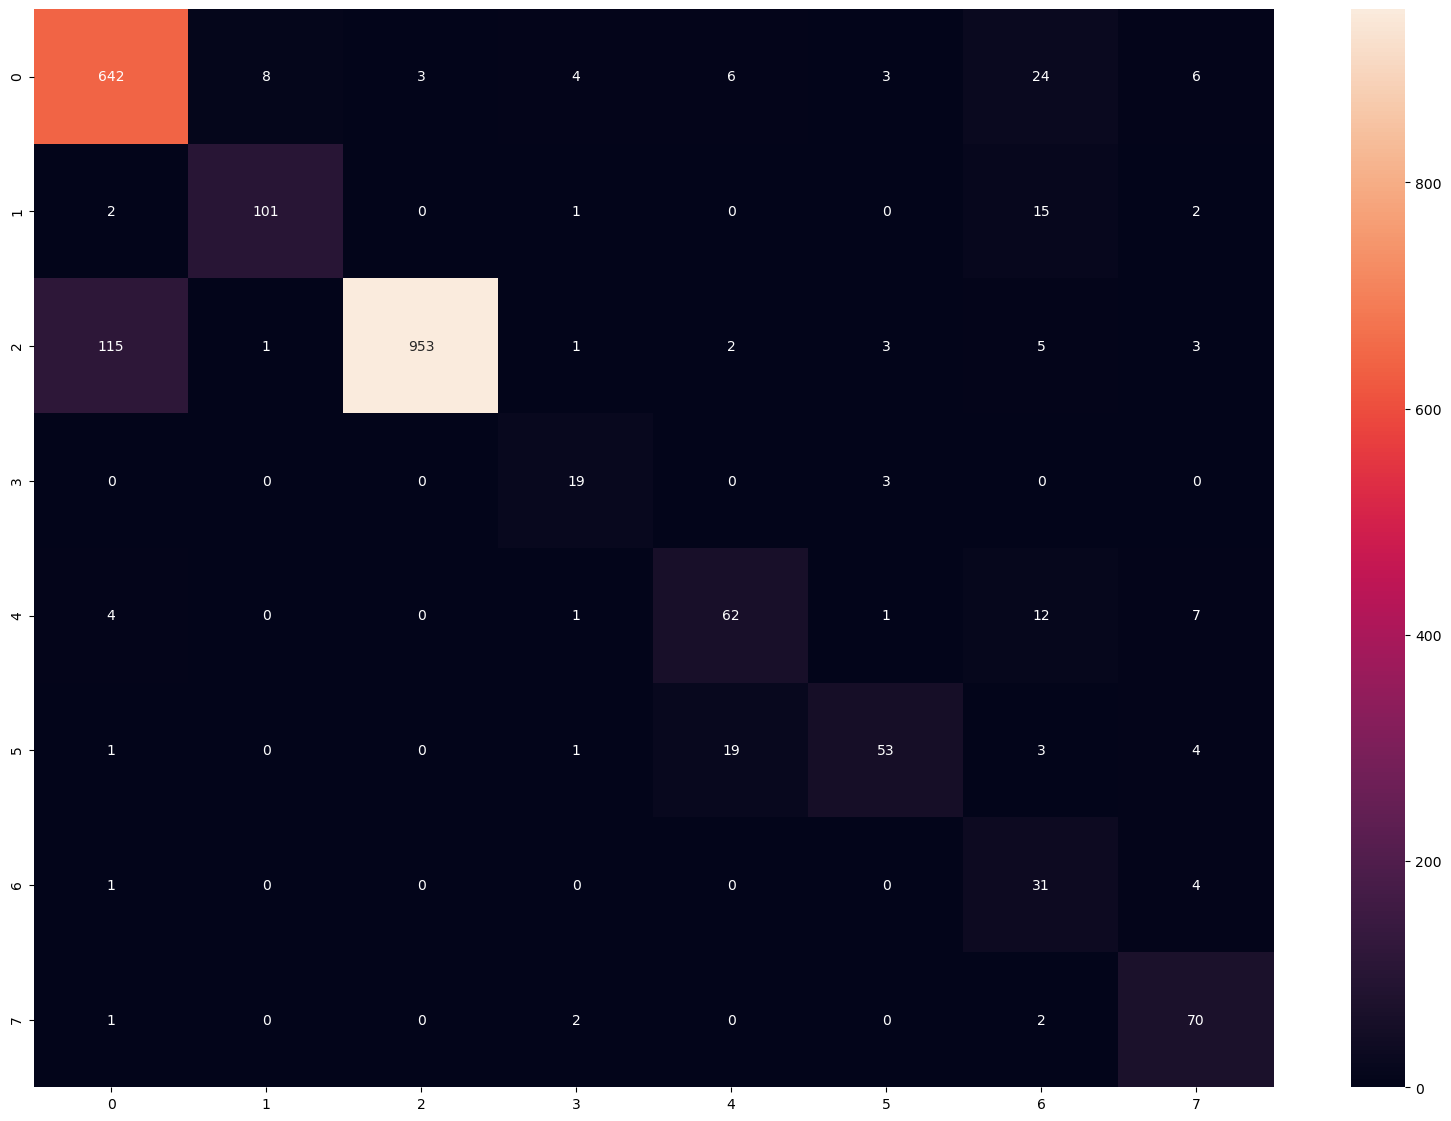

In [35]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(stat, index = [i for i in list(set(test_labels))],
                  columns = [i for i in list(set(test_labels))])
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [23]:
stat

array([[ 1.,  0., 18., 37.,  0., 41.,  0.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [36]:
## Compute accuracy
correct,all=0,0
for i in range(len(set(train_labels))):
    for j in range(len(set(train_labels))):
        if(i==j ):
            correct+=stat[i][j]
        all+=stat[i][j]
print(correct/all*100)

87.73284870513403


In [7]:
import textattack
import pandas as pd
df_attack = pd.read_csv("attack_dataset_8_classes_1.csv")

data = []
for index, row in df_attack.iterrows():
    data.append((row['text'], row['label']))

df_attack_2 = pd.read_csv("attack_dataset_8_classes_2.csv")
for index, row in df_attack_2.iterrows():
    data.append((row['text'], row['label']))
    
dataset = textattack.datasets.Dataset(data)

2022-05-02 23:45:52.234191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 23:45:52.234220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
class HDModel():
    def __init__(self, lang_vectors, alphabet, seed, dimension):
        self.lang_vectors = lang_vectors
        self.alphabet = alphabet
        self.seed = seed
        self.dimension = dimension
        
    def genTextVector(text, alphabet,sim_input, window=4, d=10000):
        text=filterText(text)
        ## generate text vector for a given text
        final = emptyVector()
        text = list(text)
    #     print(text)
        flag_1=0
        for i in range(len(text)-window+1):
            cur = text[i:i+window]
            temp =emptyVector()
            flag=1;
            flag_0=0
            for j in range(1,window+1):
                arr = alphabet[cur[j-1]]
                for k in range(j-1):
                    arr=np.roll(arr, 1)
    #             arr=np.power(arr,sim_input*j)
                if flag == 1:
                    temp=arr
                    flag=0
                else:
                    temp=temp*arr
    #             bind(arr,temp)
    #         superimpose(temp,final)
            final=final+temp
    #     normalize(final)
        final = np.sqrt(d) * final / np.linalg.norm(final)
        return final

    def load_obj(self, name):
        with open('obj/' + name + '.pkl', 'rb') as f:
            return pickle.load(f)

In [9]:
import pandas as pd
import pickle
import random

from textattack.models.wrappers import ModelWrapper


class HDModelWrapper(ModelWrapper):
    """Loads a scikit-learn model and tokenizer (tokenizer implements
    `transform` and model implements `predict_proba`).
    May need to be extended and modified for different types of
    tokenizers.
    """

    def __init__(self, model):
        self.model = model
        
    def __call__(self, text_input_list, batch_size=None):
        results_out = []
#         print(text_input_list)
        for text in text_input_list:
            testFilteredText = genTextVector(text, alphabet, sim_input)
            results_temp =  dist= 1-distance.cdist([testFilteredText], classVectorsdumy, 'cosine')
            results_out.append(results_temp[0])
        return results_out
        
    def get_grad(self, text_input):
        raise NotImplementedError()
        
    def cosineSimiliraty(self, a,b):
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #cos_sim = 1 - spatial.distance.cosine(a, b)
        return cos_sim

In [10]:
model = HDModel(classVectorsdumy, alphabet, randomSeed, 10000)
model_wrapper = HDModelWrapper(model)

In [11]:
from textattack.datasets import HuggingFaceDataset
from textattack.attack_recipes import TextFoolerJin2019, DeepWordBugGao2018, TextBuggerLi2018, GeneticAlgorithmAlzantot2018, PWWSRen2019
from textattack import Attacker
from textattack import AttackArgs

# dataset = custom_dataset
attack = TextFoolerJin2019.build(model_wrapper)

# dataset = HuggingFaceDataset("newsgroup", None, "test")

attack_args = AttackArgs(num_examples=200, log_to_csv="hd_8_classes_attack_textfooler_new_window_4.csv")
attacker = Attacker(attack, dataset, attack_args)
attacker.attack_dataset()



textattack: Unknown if model of class <class '__main__.HDModel'> compatible with goal function <class 'textattack.goal_functions.classification.untargeted_classification.UntargetedClassification'>.
textattack: Logging to CSV at path hd_8_classes_attack_textfooler_new_window_4.csv
  0%|                                                   | 0/200 [00:00<?, ?it/s]

Attack(
  (search_method): GreedyWordSwapWIR(
    (wir_method):  delete
  )
  (goal_function):  UntargetedClassification
  (transformation):  WordSwapEmbedding(
    (max_candidates):  50
    (embedding):  WordEmbedding
  )
  (constraints): 
    (0): WordEmbeddingDistance(
        (embedding):  WordEmbedding
        (min_cos_sim):  0.5
        (cased):  False
        (include_unknown_words):  True
        (compare_against_original):  True
      )
    (1): PartOfSpeech(
        (tagger_type):  nltk
        (tagset):  universal
        (allow_verb_noun_swap):  True
        (compare_against_original):  True
      )
    (2): UniversalSentenceEncoder(
        (metric):  angular
        (threshold):  0.840845057
        (window_size):  15
        (skip_text_shorter_than_window):  True
        (compare_against_original):  False
      )
    (3): RepeatModification
    (4): StopwordModification
    (5): InputColumnModification(
        (matching_column_labels):  ['premise', 'hypothesis']
       

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
/home/harsha/.local/lib/python3.8/site-packages/textattack/goal_functions/classification/classification_goal_function.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  scores = torch.tensor(scores)
2022-05-02 23:47:14.708031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-02 23:47:14.708063: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-02 23:47:14.708082: I tensor

--------------------------------------------- Result 1 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

blount [[inc]] blt [[th]] qtr net oper shr [[cts]] [[vs]] three [[cts]] oper [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] avg shrs [[mln]] [[vs]] [[mln]] [[year]] oper shr [[cts]] [[vs]] cts oper [[net]] [[vs]] [[revs]] billion [[vs]] billion avg shrs [[mln]] [[vs]] [[mln]] [[note]] [[prior]] [[year]] [[net]] [[excludes]] [[gains]] dlrs in [[quarter]] and dlrs in year from termination of overfunded pension plans backlog billion dlrs [[vs]] [[mln]] dlrs reuter 

blount [[serv]] blt [[gerardo]] qtr net oper shr [[secretariat]] [[versus]] three [[tuberculosis]] oper [[nabbed]] [[versus]] [[sputters]] [[zillion]] [[versus]] [[zillion]] avg shrs [[gazillion]] [[versus]] [[zillion]] [[sunni]] oper shr [[secretariat]] [[usa]] cts oper [[nabbed]] [[versus]] [[sputters]] billion [[volts]] billion avg shrs [[billionth]] [[versus]] [[zillion]] [[observation]] [[prece

[Succeeded / Failed / Skipped / Total] 1 / 0 / 0 / 1:   1%| | 2/200 [05:20<8:49:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 2 / 0 / 0 / 2:   1%| | 2/200 [05:20<8:49:

--------------------------------------------- Result 2 ---------------------------------------------
[[2 (16%)]] --> [[0 (13%)]]

gorman rupp co grc sets quarterly qtly [[div]] [[cts]] [[vs]] [[cts]] [[prior]] [[pay]] june [[record]] may eight reuter 

gorman rupp co grc sets quarterly qtly [[int]] [[secretariat]] [[usa]] [[tuberculosis]] [[former]] [[paid]] june [[documentation]] may eight reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 2 / 0 / 0 / 2:   2%| | 3/200 [05:21<5:51:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 2 / 0 / 1 / 3:   2%| | 3/200 [05:21<5:51:

--------------------------------------------- Result 3 ---------------------------------------------
[[0 (13%)]] --> [[[SKIPPED]]]

international thomson to report in u s funds international thomson organisation ltd said it will report financial results in u s funds rather than sterling beginning from jan it said the change will not be applied retroactively to prior financial periods the company said as a result of recent investments most of its assets now are located in the united states reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 2 / 0 / 1 / 3:   2%| | 4/200 [08:25<6:52:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 3 / 0 / 1 / 4:   2%| | 4/200 [08:25<6:52:

--------------------------------------------- Result 4 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

wesbanco wsbc o acquiring bank of sissonville wesbanco inc [[said]] its board executed a merger agreement with the bank of sissonville when the merger is [[completed]] each of the [[shares]] of the bank of sissonville common stock outstanding will be converted into [[shares]] of wesbanco common stock the [[company]] said the bank of sissonville has total assets of mln dlrs as of dec the [[company]] said reuter 

wesbanco wsbc o acquiring bank of sissonville wesbanco inc [[explains]] its board executed a merger agreement with the bank of sissonville when the merger is [[finished]] each of the [[traded]] of the bank of sissonville common stock outstanding will be converted into [[traded]] of wesbanco common stock the [[societal]] said the bank of sissonville has total assets of mln dlrs as of dec the [[societal]] said reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 3 / 0 / 1 / 4:   2%| | 5/200 [12:09<7:54:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 4 / 0 / 1 / 5:   2%| | 5/200 [12:09<7:54:

--------------------------------------------- Result 5 ---------------------------------------------
[[0 (15%)]] --> [[4 (13%)]]

pepsico unit pep lifts calny o stake taco bell [[corp]] a unit of pepsico [[inc]] [[said]] it increased its stake in calny [[inc]] [[common]] stock to [[shares]] or pct of the total outstanding from a previous figure of approximately [[shares]] or pct in a filing with the securities and exchange [[commission]] taco bell [[said]] it bought calny common [[shares]] on october and at dlrs a [[share]] no reason was given for the recent purchases reuter 

pepsico unit pep lifts calny o stake taco bell [[eilat]] a unit of pepsico [[lnc]] [[explains]] it increased its stake in calny [[lnc]] [[frequent]] stock to [[exchange]] or pct of the total outstanding from a previous figure of approximately [[exchange]] or pct in a filing with the securities and exchange [[junta]] taco bell [[explains]] it bought calny common [[exchange]] on october and at dlrs a [[exchange]] n

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 4 / 0 / 1 / 5:   3%| | 6/200 [25:20<13:39/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 5 / 0 / 1 / 6:   3%| | 6/200 [25:20<13:39

--------------------------------------------- Result 6 ---------------------------------------------
[[1 (14%)]] --> [[3 (13%)]]

malaysia advised to raise [[crude]] [[oil]] output in malaysia s national [[oil]] company petronas has advised the government to [[raise]] [[crude]] [[oil]] output to [[barrels]] a day bpd in from a current bpd a senior company official [[said]] we have the [[capacity]] to [[produce]] the amount rastam hadi petronas s vice president for upstream sector [[said]] the government [[will]] announce its decision on friday when it unveils the country s budget malaysia [[raised]] output this month to current [[levels]] from bpd after reviewing the world [[oil]] market in may malaysia cut output to bpd from in response to a call by opec to boost [[prices]] reuter 

malaysia advised to raise [[disrespectful]] [[hydrocarbons]] output in malaysia s national [[hydrocarbons]] company petronas has advised the government to [[rise]] [[disrespectful]] [[hydrocarbons]] output

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 5 / 0 / 1 / 6:   4%| | 7/200 [36:06<16:35/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 6 / 0 / 1 / 7:   4%| | 7/200 [36:06<16:35

--------------------------------------------- Result 7 ---------------------------------------------
[[5 (13%)]] --> [[4 (13%)]]

u s bill auction rates average pct the u s treasury said its weekly auction of three month bills produced an average rate of pct with a pct rate on six month bills these [[rates]] compared with averages of pct for the three and pct for the six month bills sold last week the bond equivalent yield on three month bills was pct accepted bids ranges from to pct and pct of the bids at the high or stopout rate were taken for six months the yield was pct and the bids ranged from pct to pct with pct of the bids accepted the treasury said it received billion dlrs of bids for the three month bills including billion dlrs in non competitive bids from the public it accepted billion dlrs of bids including billion dlrs from the federal reserve and mln dlrs from foreign and international monetary authorities some billion dlrs in bids for six month bills were received includi

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 6 / 0 / 1 / 7:   4%| | 8/200 [39:27<15:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 0 / 1 / 8:   4%| | 8/200 [39:27<15:47

--------------------------------------------- Result 8 ---------------------------------------------
[[2 (15%)]] --> [[0 (13%)]]

gateway federal savings gatw o [[rd]] qtr [[net]] shr [[cts]] [[vs]] not given net [[vs]] not given nine mths shr dlrs [[vs]] not given net [[vs]] not given [[note]] full [[name]] is gateway federal savings and loan association latest qtr [[includes]] a tax credit of dlrs or cents a [[share]] latest nine mths [[includes]] a tax credit of dlrs or dlrs figures not given as company went public on june reuter 

gateway federal savings gatw o [[doktor]] qtr [[nabbed]] shr [[ect]] [[against]] not given net [[versus]] not given nine mths shr dlrs [[against]] not given net [[versus]] not given [[commenting]] full [[designation]] is gateway federal savings and loan association latest qtr [[therein]] a tax credit of dlrs or cents a [[portion]] latest nine mths [[covering]] a tax credit of dlrs or dlrs figures not given as company went public on june reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 7 / 0 / 1 / 8:   4%| | 9/200 [40:18<14:15/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 1 / 1 / 9:   4%| | 9/200 [40:18<14:15

--------------------------------------------- Result 9 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

kent electronics corp kec nd qtr sept net shr cts vs seven cts net vs revs vs avg shrs vs nine mths shr cts vs cts net vs revs mln vs avg shrs vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 7 / 1 / 1 / 9:   5%| | 10/200 [1:14:06<23/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 1 / 1 / 10:   5%| | 10/200 [1:14:06<2

--------------------------------------------- Result 10 ---------------------------------------------
[[7 (15%)]] --> [[6 (13%)]]

u s weighs lifting [[japanese]] [[trade]] curbs the white house has completed a new review of [[japanese]] semiconductor [[trading]] practices but has not yet decided whether [[trade]] [[sanctions]] levied against [[japan]] last april should be lifted [[u]] s officials said they said the president s economic policy council looked at [[japan]] s adherence to the [[u]] s [[japanese]] semiconductor pact yesterday and that an announcement may be [[made]] shortly but there was no hint what the announcement might be officials have said the pct tariffs on mln dlrs of [[japanese]] [[exports]] could be modified if [[japan]] was found to be honoring a portion of its semiconductor pact but they also noted that the white house has said it was unlikely the [[tariffs]] would be lifted before the meeting of the world s seven major [[economic]] powers in venice on june the

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 8 / 1 / 1 / 10:   6%| | 11/200 [1:16:58<2/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 1 / 1 / 11:   6%| | 11/200 [1:16:58<2/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 11 ---------------------------------------------
[[4 (13%)]] --> [[6 (13%)]]

white house says u s [[monetary]] policy correct the white house distancing itself from remarks by the administration s budget chief said the federal reserve s [[current]] course of [[monetary]] policy was appropriate the administration feels that the [[current]] course of [[monetary]] policy is appropriate white house spokesman marlin fitwater said fitzwater said the administration did not endorse remarks by white house budget chief james miller who said he was concerned the federal reserve might overreact to the decline in the value of the u s [[dollar]] by raising interest rates more 

white house says u s [[qian]] policy correct the white house distancing itself from remarks by the administration s budget chief said the federal reserve s [[present]] course of [[qian]] policy was appropriate the administration feels that the [[constant]] course of [[qian

[Succeeded / Failed / Skipped / Total] 9 / 1 / 1 / 11:   6%| | 12/200 [1:17:18<2/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 2 / 1 / 12:   6%| | 12/200 [1:17:18<2

--------------------------------------------- Result 12 ---------------------------------------------
[[2 (19%)]] --> [[[FAILED]]]

slater electric inc slat st qtr feb net shr four cts vs cts net vs sales mln vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 9 / 2 / 1 / 12:   6%| | 13/200 [1:18:13<1/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 10 / 2 / 1 / 13:   6%| | 13/200 [1:18:13<

--------------------------------------------- Result 13 ---------------------------------------------
[[2 (17%)]] --> [[7 (13%)]]

general electric [[co]] ge [[st]] qtr net shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] sales billion [[vs]] billion note prior [[year]] does not [[include]] [[results]] of rca [[corp]] reuter 

general electric [[commanding]] ge [[sainte]] qtr net shr dlrs [[usa]] dlrs net [[billions]] [[usa]] [[billions]] sales billion [[volts]] billion note prior [[enjoyment]] does not [[covering]] [[culmination]] of rca [[corporation]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 10 / 2 / 1 / 13:   7%| | 14/200 [1:31:08</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 11 / 2 / 1 / 14:   7%| | 14/200 [1:31:08<

--------------------------------------------- Result 14 ---------------------------------------------
[[6 (14%)]] --> [[3 (13%)]]

rio de janeiro dockers [[strike]] rio de janeiro s dockworkers went on [[strike]] for an indefinite period [[today]] to demand wage increases a [[spokesman]] for the [[dockers]] said the rio dockers did not get [[support]] from their colleagues in [[santos]] [[brazil]] s main [[port]] but the [[spokesman]] [[said]] they would not [[return]] to [[work]] unless their demands were met [[earlier]] this week some dockworkers [[cancelled]] a [[scheduled]] national [[strike]] to pressure [[port]] [[officials]] to give them a wage increase and other benefits a rio [[port]] spokesman [[said]] the halt would cause daily losses of about u s dlrs reuter 

rio de janeiro dockers [[bombardment]] rio de janeiro s dockworkers went on [[bombardment]] for an indefinite period [[present]] to demand wage increases a [[commentator]] for the [[longshoremen]] said the rio dockers

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 11 / 2 / 1 / 14:   8%| | 15/200 [1:32:08</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 12 / 2 / 1 / 15:   8%| | 15/200 [1:32:08<

--------------------------------------------- Result 15 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

helene curtis industries inc hc [[st]] qtr [[net]] period end may shr [[profit]] four [[cts]] [[vs]] [[loss]] [[cts]] [[net]] profit [[vs]] [[loss]] [[revs]] [[mln]] [[vs]] [[mln]] reuter 

helene curtis industries inc hc [[sainte]] qtr [[neta]] period end may shr [[earnings]] four [[secretariat]] [[usa]] [[destruction]] [[tuberculosis]] [[imprisoning]] profit [[v]] [[destruction]] [[sputters]] [[billions]] [[usa]] [[billionth]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 12 / 2 / 1 / 15:   8%| | 16/200 [1:32:57</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 2 / 1 / 16:   8%| | 16/200 [1:32:57<

--------------------------------------------- Result 16 ---------------------------------------------
[[2 (16%)]] --> [[0 (13%)]]

eastek corp estk o st qtr sept loss shr loss [[cts]] [[vs]] loss four [[cts]] [[net]] [[loss]] [[vs]] loss revs [[vs]] not available note the company made its initial offering in march and before then had been a development stage company so no sales were posted in reuter 

eastek corp estk o st qtr sept loss shr loss [[tb]] [[v]] loss four [[tuberculosis]] [[wisp]] [[loosing]] [[v]] loss revs [[fifth]] not available note the company made its initial offering in march and before then had been a development stage company so no sales were posted in reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 13 / 2 / 1 / 16:   8%| | 17/200 [1:33:59</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 3 / 1 / 17:   8%| | 17/200 [1:33:59<

--------------------------------------------- Result 17 ---------------------------------------------
[[2 (17%)]] --> [[[FAILED]]]

erie lackawanna inc erie o rd qtr net shr dlrs vs dlrs net vs total income vs nine mths shr dlrs vs dlrs net vs total income vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 13 / 3 / 1 / 17:   9%| | 18/200 [1:36:28</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 14 / 3 / 1 / 18:   9%| | 18/200 [1:36:28<

--------------------------------------------- Result 18 ---------------------------------------------
[[7 (14%)]] --> [[6 (13%)]]

u s house speaker denies [[trade]] bill hurt stocks house speaker jim wright dismissed charges that the [[trade]] bill before congress contributed to the fall in stock prices on wall street that is utterly ridiculous the texas democrat told reporters treasury secretary james baker and other [[administration]] officials over the weekend pointed to the pending legislation which they brand too protectionist as a key factor in the record setting drop reuter 

u s house speaker denies [[contracts]] bill hurt stocks house speaker jim wright dismissed charges that the [[contracts]] bill before congress contributed to the fall in stock prices on wall street that is utterly ridiculous the texas democrat told reporters treasury secretary james baker and other [[administering]] officials over the weekend pointed to the pending legislation which they brand too protecti

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 14 / 3 / 1 / 18:  10%| | 19/200 [1:38:56</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 15 / 3 / 1 / 19:  10%| | 19/200 [1:38:56<

--------------------------------------------- Result 19 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

american business [[products]] [[inc]] abp [[rd]] qtr shr [[cts]] [[vs]] eight [[cts]] [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths shr dlrs [[vs]] dlrs net [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] note qtr and nine mths [[includes]] [[loss]] dlrs or [[cts]] per [[share]] from unspecified extraordinary item reuter 

american business [[fabrication]] [[lnc]] abp [[doktor]] qtr shr [[secretariat]] [[versus]] eight [[tuberculosis]] [[wisp]] [[versus]] [[sputters]] [[zillion]] [[versus]] [[zillion]] nine mths shr dlrs [[versus]] dlrs net [[versus]] [[sputters]] [[zillion]] [[versus]] [[zillion]] note qtr and nine mths [[covering]] [[destruction]] dlrs or [[ect]] per [[communication]] from unspecified extraordinary item reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 15 / 3 / 1 / 19:  10%| | 20/200 [1:41:17</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 16 / 3 / 1 / 20:  10%| | 20/200 [1:41:17<

--------------------------------------------- Result 20 ---------------------------------------------
[[2 (19%)]] --> [[0 (13%)]]

[[victoria]] banckshares [[inc]] vict o [[rd]] qtr [[net]] shr [[profit]] [[two]] [[cts]] [[vs]] [[loss]] dlrs [[net]] profit [[vs]] [[loss]] [[mln]] nine mths shr profit [[cts]] [[vs]] [[loss]] dlrs [[net]] [[profit]] [[vs]] [[loss]] [[mln]] reuter 

[[winning]] banckshares [[lnc]] vict o [[doktor]] qtr [[neta]] shr [[interests]] [[three]] [[tuberculosis]] [[versus]] [[destruction]] dlrs [[imprisoning]] profit [[versus]] [[destruction]] [[zillion]] nine mths shr profit [[secretariat]] [[versus]] [[destruction]] dlrs [[imprisoning]] [[paid]] [[versus]] [[destruction]] [[zillion]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 16 / 3 / 1 / 20:  10%| | 21/200 [1:42:12</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 16 / 4 / 1 / 21:  10%| | 21/200 [1:42:12<

--------------------------------------------- Result 21 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

philip crosby associates inc pcro th qtr net shr three cts vs cts net vs revs mln vs year shr cts vs cts net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 16 / 4 / 1 / 21:  11%| | 22/200 [1:45:34</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 17 / 4 / 1 / 22:  11%| | 22/200 [1:45:34<

--------------------------------------------- Result 22 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

may ma won t buy allied s dey brothers stores may department stores co [[said]] it terminated an [[agreement]] with allied stores [[corp]] to buy from allied the four dey brothers stores in syracuse n y may and allied [[said]] conditions necessary for the [[closing]] were not met may had planned to make the [[acquisition]] an expansion of its sibley s department store [[co]] which operates in syracuse rochester and buffalo n y reuter 

may ma won t buy allied s dey brothers stores may department stores co [[explains]] it terminated an [[market]] with allied stores [[eilat]] to buy from allied the four dey brothers stores in syracuse n y may and allied [[explains]] conditions necessary for the [[shut]] were not met may had planned to make the [[shopping]] an expansion of its sibley s department store [[chis]] which operates in syracuse rochester and buffalo 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 17 / 4 / 1 / 22:  12%| | 23/200 [1:47:18</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 17 / 5 / 1 / 23:  12%| | 23/200 [1:47:18<

--------------------------------------------- Result 23 ---------------------------------------------
[[2 (17%)]] --> [[[FAILED]]]

florida employers insurance flaef o rd qtr shr cts vs cts net vs nine mths shr cts vs cts net vs note full name of company is florida employers insurance co reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 17 / 5 / 1 / 23:  12%| | 24/200 [1:50:15</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 5 / 1 / 24:  12%| | 24/200 [1:50:15<

--------------------------------------------- Result 24 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

national beverage to [[acquire]] faygo beverages national beverage [[corp]] [[said]] it [[agreed]] to [[acquire]] faygo beverages [[inc]] for an [[undisclosed]] [[amount]] of [[cash]] faygo [[has]] revenues in excess of of [[mln]] dlrs national beverage [[said]] reuter 

national beverage to [[obtains]] faygo beverages national beverage [[eilat]] [[explains]] it [[endorse]] to [[obtains]] faygo beverages [[serv]] for an [[indefinite]] [[tonnage]] of [[currencies]] faygo [[maintains]] revenues in excess of of [[billions]] dlrs national beverage [[explains]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 18 / 5 / 1 / 24:  12%|▏| 25/200 [1:56:14</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 5 / 1 / 25:  12%|▏| 25/200 [1:56:14<

--------------------------------------------- Result 25 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

computer memories cmin o to delay [[merger]] computer memories [[inc]] [[said]] its board [[has]] decided to take additional time to evaluate the impact of litigation on the [[proposed]] [[acquisition]] of hemdale film [[corp]] computer memories [[said]] it plans to adjourn its annual [[shareholders]] meeting scheduled for october after it is convened one purpose of the meeting is to [[consider]] the transaction the [[company]] explained computer memories [[said]] hemdale agrees with this course of action reuter 

computer memories cmin o to delay [[melted]] computer memories [[lnc]] [[explains]] its board [[maintains]] decided to take additional time to evaluate the impact of litigation on the [[suggesting]] [[shopping]] of hemdale film [[enterprises]] computer memories [[explains]] it plans to adjourn its annual [[collaborators]] meeting scheduled for oct

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 19 / 5 / 1 / 25:  13%|▏| 26/200 [2:03:01</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 20 / 5 / 1 / 26:  13%|▏| 26/200 [2:03:01</home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 26 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

sico sic to to buy reichold rci [[unit]] assets sico [[inc]] [[said]] it [[agreed]] in principle to buy the u s assets of reichold chemicals [[inc]] s sterling [[group]] which [[manufactures]] electrical insulation [[compounds]] and industrial resins and develops coatings for the electronics industry terms were [[undisclosed]] sico [[said]] it [[acquired]] sterling [[group]] s canadian assets in february it [[said]] the u s [[acquisition]] adds about mln dlrs to its annual sales volume reuter 

sico sic to to buy reichold rci [[module]] assets sico [[lnc]] [[explains]] it [[ratify]] in principle to buy the u s assets of reichold chemicals [[serv]] s sterling [[teaming]] which [[create]] electrical insulation [[intricate]] and industrial resins and develops coatings for the electronics industry terms were [[unreported]] sico [[explains]] it [[attains]] sterl

[Succeeded / Failed / Skipped / Total] 20 / 5 / 1 / 26:  14%|▏| 27/200 [2:03:07</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 5 / 1 / 27:  14%|▏| 27/200 [2:03:07<

--------------------------------------------- Result 27 ---------------------------------------------
[[0 (13%)]] --> [[5 (13%)]]

barris ind says it leads [[group]] with pct of media general may seek control 

barris ind says it leads [[syndicates]] with pct of media general may seek control 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 21 / 5 / 1 / 27:  14%|▏| 28/200 [2:03:08</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 5 / 2 / 28:  14%|▏| 28/200 [2:03:08<

--------------------------------------------- Result 28 ---------------------------------------------
[[6 (14%)]] --> [[[SKIPPED]]]

kenya devalues shilling by pct against sdr kenya devalued the shilling by pct against the special drawing right sdr in response to the decline of the dollar last last week bankers said the central bank of kenya set the shilling at to the sdr compared with the rate in force since the last devaluation on march the kenyan shilling has lost pct of its value against the sdr this year in a series of devaluations designed to keep the value of the dollar above shillings reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 21 / 5 / 2 / 28:  14%|▏| 29/200 [2:03:49</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 6 / 2 / 29:  14%|▏| 29/200 [2:03:49<

--------------------------------------------- Result 29 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

burnham service corp bsco o rd qtr net shr cts vs cts net vs revs mln vs mln nine mths shr dlrs vs cts net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 21 / 6 / 2 / 29:  15%|▏| 30/200 [2:05:58</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 22 / 6 / 2 / 30:  15%|▏| 30/200 [2:05:58<

--------------------------------------------- Result 30 ---------------------------------------------
[[1 (14%)]] --> [[0 (13%)]]

southland slc unit raises [[crude]] cts bbl southland corp s subsidiary citgo petroleum said it raised its posted [[prices]] for [[crude]] [[oil]] across the board by cts a [[barrel]] effective june citgo said its new posting for west texas intermediate and west texas sour is dlrs a [[barrel]] light louisiana sweet is now posted at the company said reuter 

southland slc unit raises [[approximate]] cts bbl southland corp s subsidiary citgo petroleum said it raised its posted [[rate]] for [[approximate]] [[lubricate]] across the board by cts a [[howitzer]] effective june citgo said its new posting for west texas intermediate and west texas sour is dlrs a [[howitzer]] light louisiana sweet is now posted at the company said reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 22 / 6 / 2 / 30:  16%|▏| 31/200 [2:08:40</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 22 / 7 / 2 / 31:  16%|▏| 31/200 [2:08:40<

--------------------------------------------- Result 31 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

eastern utilities associates rd qtr net shr cts vs cts net mln vs mln revs mln vs mln avg shrs vs nine mths shr dlrs vs dlrs net mln vs vs mln revs mln vs mln avg shrs vs mths shr dlrs vs dlrs net mln vs mln revs mln vs mln avg shrs vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 22 / 7 / 2 / 31:  16%|▏| 32/200 [2:13:39</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 23 / 7 / 2 / 32:  16%|▏| 32/200 [2:13:39<

--------------------------------------------- Result 32 ---------------------------------------------
[[2 (17%)]] --> [[0 (13%)]]

first american bank for [[savings]] famb o [[rd]] qtr shr [[cts]] [[vs]] cts [[net]] [[vs]] nine mths shr dlrs [[vs]] not [[given]] [[net]] [[mln]] [[vs]] note company went public in [[july]] [[net]] [[includes]] [[loan]] [[loss]] provisions of dlrs [[vs]] dlrs in [[quarter]] and dlrs [[vs]] dlrs in nine mths net [[includes]] pretax [[gains]] on [[sale]] of assets of dlrs [[vs]] dlrs in [[quarter]] and dlrs [[vs]] dlrs in nine mths reuter 

first american bank for [[conservation]] famb o [[doktor]] qtr shr [[tb]] [[usa]] cts [[neta]] [[usa]] nine mths shr dlrs [[versus]] not [[auctioned]] [[nabbed]] [[billionth]] [[versus]] note company went public in [[september]] [[nabbed]] [[therein]] [[lending]] [[destruction]] provisions of dlrs [[versus]] dlrs in [[semesters]] and dlrs [[versus]] dlrs in nine mths net [[consisting]] pretax [[augmentation]] on [[sellin

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 23 / 7 / 2 / 32:  16%|▏| 33/200 [2:15:23</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 24 / 7 / 2 / 33:  16%|▏| 33/200 [2:15:23<

--------------------------------------------- Result 33 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

safeguard [[health]] sfgd o [[rd]] qtr [[net]] shr [[cts]] [[vs]] [[five]] cts [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths shr [[cts]] [[vs]] cts [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] [[note]] [[full]] [[name]] safeguard [[health]] [[enterprises]] [[inc]] reuter 

safeguard [[sanitation]] sfgd o [[ds]] qtr [[nabbed]] shr [[secretariat]] [[versus]] [[three]] cts [[neta]] [[versus]] [[sputters]] [[zillion]] [[versus]] [[zillion]] nine mths shr [[tb]] [[usa]] cts [[neta]] [[usa]] [[sputters]] [[zillion]] [[versus]] [[zillion]] [[commenting]] [[unconditional]] [[appointment]] safeguard [[sanitation]] [[corporation]] [[serv]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 24 / 7 / 2 / 33:  17%|▏| 34/200 [2:17:41</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 7 / 2 / 34:  17%|▏| 34/200 [2:17:41<

--------------------------------------------- Result 34 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

leader development ldco o merger approved leader development corp said [[shareholders]] at the annual meeting approved the [[acquisition]] of privately held clinton american corp and two related partnerships for common [[shares]] with the transaction to be accounted for as a pooling of interests the [[company]] [[said]] clinton president f daniel ryan will become president of leader reuter 

leader development ldco o merger approved leader development corp said [[taxpayer]] at the annual meeting approved the [[shopping]] of privately held clinton american corp and two related partnerships for common [[traded]] with the transaction to be accounted for as a pooling of interests the [[entrepreneurs]] [[reported]] clinton president f daniel ryan will become president of leader reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 25 / 7 / 2 / 34:  18%|▏| 35/200 [2:19:02</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 26 / 7 / 2 / 35:  18%|▏| 35/200 [2:19:02<

--------------------------------------------- Result 35 ---------------------------------------------
[[5 (15%)]] --> [[7 (13%)]]

freddie mac adjusts short term discount [[rates]] the [[federal]] home [[loan]] mortgage corp adjusted the [[rates]] on its short term discount notes as follows maturity [[rate]] old [[rate]] maturity [[days]] pct pct [[days]] reuter 

freddie mac adjusts short term discount [[proportions]] the [[governmental]] home [[appropriations]] mortgage corp adjusted the [[proportions]] on its short term discount notes as follows maturity [[proportions]] old [[proportions]] maturity [[moment]] pct pct [[jours]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 26 / 7 / 2 / 35:  18%|▏| 36/200 [2:23:14</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 7 / 2 / 36:  18%|▏| 36/200 [2:23:14<

--------------------------------------------- Result 36 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

entre computer centers inc etre nd qtr [[loss]] shr loss [[cts]] [[vs]] profit [[cts]] [[net]] [[loss]] [[vs]] profit [[revs]] [[mln]] [[vs]] [[mln]] st half shr loss [[cts]] [[vs]] profit [[cts]] [[net]] [[loss]] [[vs]] profit [[revs]] [[mln]] [[vs]] [[mln]] [[note]] current [[year]] [[net]] both periods includes dlr pretax provision for closing overseas operations and tax credits dlrs in [[quarter]] and dlrs in half reuter 

entre computer centers inc etre nd qtr [[destruction]] shr loss [[secretariat]] [[versus]] profit [[tuberculosis]] [[arresting]] [[destruction]] [[versus]] profit [[sputters]] [[billions]] [[usa]] [[billions]] st half shr loss [[secretariat]] [[usa]] profit [[tuberculosis]] [[arresting]] [[destruction]] [[versus]] profit [[sputters]] [[billions]] [[usa]] [[billions]] [[commenting]] current [[olds]] [[arresting]] both periods includes 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 27 / 7 / 2 / 36:  18%|▏| 37/200 [2:32:35</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 7 / 2 / 37:  18%|▏| 37/200 [2:32:35<

--------------------------------------------- Result 37 ---------------------------------------------
[[2 (21%)]] --> [[0 (13%)]]

convergent [[inc]] cvgt o [[rd]] qtr [[net]] shr [[profit]] [[four]] [[cts]] [[vs]] [[loss]] [[cts]] [[net]] [[profit]] [[vs]] [[loss]] mln [[revs]] mln [[vs]] [[mln]] avg shrs mln [[vs]] [[mln]] nine mths shr [[loss]] [[cts]] [[vs]] [[loss]] [[cts]] [[net]] [[loss]] [[vs]] [[loss]] mln [[revs]] mln [[vs]] [[mln]] avg shrs mln [[vs]] [[mln]] [[note]] [[net]] [[includes]] [[tax]] [[credits]] of dlrs in [[quarter]] and dlrs in nine mths nine mths [[results]] restated for [[pooled]] acquisition of bidtek [[inc]] reuter 

convergent [[ltd]] cvgt o [[doktor]] qtr [[apprehended]] shr [[interests]] [[three]] [[secretariat]] [[versus]] [[destruction]] [[tuberculosis]] [[imprisoning]] [[remuneration]] [[versus]] [[destruction]] mln [[sputters]] mln [[versus]] [[zillion]] avg shrs mln [[versus]] [[miilion]] nine mths shr [[destruction]] [[secretariat]] [[versus]] [[d

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 28 / 7 / 2 / 37:  19%|▏| 38/200 [2:35:04</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 7 / 2 / 38:  19%|▏| 38/200 [2:35:04<

--------------------------------------------- Result 38 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

[[chiron]] [[corp]] chir o [[th]] qtr [[april]] [[loss]] shr loss [[cts]] [[vs]] loss [[cts]] [[net]] [[loss]] [[vs]] [[loss]] [[revs]] [[vs]] [[year]] shr [[loss]] [[cts]] [[vs]] loss [[cts]] [[net]] [[loss]] [[vs]] [[loss]] [[revs]] [[vs]] reuter 

[[ceres]] [[corporation]] chir o [[aussi]] qtr [[february]] [[destruction]] shr loss [[secretariat]] [[versus]] loss [[tuberculosis]] [[imprisoning]] [[destruction]] [[versus]] [[destruction]] [[sputters]] [[volts]] [[sunni]] shr [[devastation]] [[secretariat]] [[versus]] loss [[tuberculosis]] [[imprisoning]] [[destruction]] [[versus]] [[destruction]] [[sputters]] [[volt]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 29 / 7 / 2 / 38:  20%|▏| 39/200 [2:39:52</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 30 / 7 / 2 / 39:  20%|▏| 39/200 [2:39:52<

--------------------------------------------- Result 39 ---------------------------------------------
[[2 (17%)]] --> [[0 (13%)]]

spectramed inc spmd o rd qtr [[net]] shr profit seven [[cts]] [[vs]] n a [[net]] profit [[vs]] profit sales [[mln]] [[vs]] [[mln]] nine mths shr [[loss]] ct s [[vs]] n a [[net]] [[loss]] [[vs]] protit sales [[mln]] vs [[mln]] note current nine month figures include extraordinary [[loss]] of mln dlrs or [[cts]] per share resulting from costs associated with restructuring prior quarter and nine month per share figures not applicable because company began operations in october with the acquisition of gould inc s gld medical products group reuter 

spectramed inc spmd o rd qtr [[apprehended]] shr profit seven [[tb]] [[fifth]] n a [[arresting]] profit [[fifth]] profit sales [[billionth]] [[usa]] [[billions]] nine mths shr [[destruction]] ct s [[versus]] n a [[arresting]] [[destruction]] [[fifth]] protit sales [[billionth]] vs [[billions]] note current nine month

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 30 / 7 / 2 / 39:  20%|▏| 40/200 [2:42:28</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 31 / 7 / 2 / 40:  20%|▏| 40/200 [2:42:28<

--------------------------------------------- Result 40 ---------------------------------------------
[[2 (18%)]] --> [[1 (13%)]]

culp [[inc]] culp o th qtr may two [[net]] shr [[cts]] [[vs]] cts [[net]] [[vs]] sales [[mln]] [[vs]] [[mln]] [[year]] shr dlrs [[vs]] one dlr [[net]] [[vs]] sales [[mln]] [[vs]] [[mln]] [[note]] prior [[year]] [[net]] both periods [[includes]] gain dlrs from adjustments to lifo reserves compensation related accruals and a revised effective tax rate reuter 

culp [[lnc]] culp o th qtr may two [[nabbed]] shr [[secretariat]] [[usa]] cts [[neta]] [[usa]] sales [[miilion]] [[volts]] [[miilion]] [[sunni]] shr dlrs [[against]] one dlr [[arresting]] [[volts]] sales [[miilion]] [[volts]] [[miilion]] [[commenting]] prior [[olds]] [[arresting]] both periods [[comprises]] gain dlrs from adjustments to lifo reserves compensation related accruals and a revised effective tax rate reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 31 / 7 / 2 / 40:  20%|▏| 41/200 [2:44:14</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 32 / 7 / 2 / 41:  20%|▏| 41/200 [2:44:14<

--------------------------------------------- Result 41 ---------------------------------------------
[[4 (14%)]] --> [[6 (13%)]]

lebanese pound falls sharply against dollar the lebanese pound fell sharply against the u s dollar again today with dealers attributing the decline to continued political uncertainty the pound closed at against the dollar compared to yesterday s close of political deadlock is reflected in the pound s position there was more demand and less on offer in the [[market]] one dealer told reuters the pound which was at to the dollar in january has lost more than pct of its international value over the past three months reuter 

lebanese pound falls sharply against dollar the lebanese pound fell sharply against the u s dollar again today with dealers attributing the decline to continued political uncertainty the pound closed at against the dollar compared to yesterday s close of political deadlock is reflected in the pound s position there was more demand and less 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 32 / 7 / 2 / 41:  21%|▏| 42/200 [2:45:05</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 32 / 8 / 2 / 42:  21%|▏| 42/200 [2:45:05</home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 42 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

loctite corp loc rd qtr march net shr cts vs cts net vs revs m ln vs mln nine mths shr dlrs vs dlrs net mln vs mln revs mln vs mln reuter 




[Succeeded / Failed / Skipped / Total] 32 / 8 / 2 / 42:  22%|▏| 43/200 [2:45:08</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 33 / 8 / 2 / 43:  22%|▏| 43/200 [2:45:08<

--------------------------------------------- Result 43 ---------------------------------------------
[[2 (14%)]] --> [[1 (13%)]]

security pacific expects brazil loan action to cut [[net]] by [[mln]] dlrs 

security pacific expects brazil loan action to cut [[netting]] by [[zillion]] dlrs 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 33 / 8 / 2 / 43:  22%|▏| 44/200 [2:53:17</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 34 / 8 / 2 / 44:  22%|▏| 44/200 [2:53:18<

--------------------------------------------- Result 44 ---------------------------------------------
[[5 (17%)]] --> [[0 (13%)]]

commonwealth [[bank]] cuts australian split prime the commonwealth [[bank]] of australia said it will lower its reference [[rate]] for loans to pct from pct and its overdraft reference [[rate]] to pct from [[effective]] june [[bank]] officials have said the [[bank]] regards the overdraft reference [[rate]] based on short term [[rate]] trends as its key [[prime]] lending [[rate]] to [[corporate]] customers the loan reference [[rate]] is based on longer term trends the [[bank]] is the latest to cut prime [[rates]] in recent days following a continuing decline in market [[rates]] other [[prime]] [[rates]] now range from pct to pct reuter 

commonwealth [[stockbroker]] cuts australian split prime the commonwealth [[stockbroker]] of australia said it will lower its reference [[proportions]] for loans to pct from pct and its overdraft reference [[proportions]] to

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 34 / 8 / 2 / 44:  22%|▏| 45/200 [3:09:29</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 35 / 8 / 2 / 45:  22%|▏| 45/200 [3:09:29<

--------------------------------------------- Result 45 ---------------------------------------------
[[6 (14%)]] --> [[7 (14%)]]

last minute opposition to gulf bill arises house speaker jim wright predicted passage of legislation requiring the reagan administration to provide congress with a [[report]] on its mideast gulf policy but a last minute revolt by an alliance of liberals and conservatives left the bill s fate in doubt the legislation was written in the wake of the may th iraqi missile attack on the u s frigate stark in the gulf which killed americans and president reagan s decision to protect kuwaiti oil [[tankers]] by putting them under u s flags effectively making them american [[ships]] since the administration made known its reflagging plans congressional leaders complained they had not been consulted and some charged the policy could lead the united states into the year old war between iran and iraq the house was to vote today on a bill supported by the democratic and r

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 35 / 8 / 2 / 45:  23%|▏| 46/200 [3:13:06</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 36 / 8 / 2 / 46:  23%|▏| 46/200 [3:13:06<

--------------------------------------------- Result 46 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

insurance firm as piezo pepi o preferred [[stake]] corporate life insurance [[co]] a west chester pa insurance firm told the [[securities]] and exchange [[commission]] it [[has]] [[acquired]] [[shares]] of preferred stock in piezo electric products [[inc]] or pct of the total corporate insurance [[said]] it bought the cumulative convertible preferred [[stock]] [[stake]] for dlrs for [[investment]] purposes reuter 

insurance firm as piezo pepi o preferred [[risk]] corporate life insurance [[chis]] a west chester pa insurance firm told the [[portfolio]] and exchange [[junta]] it [[possesses]] [[gains]] [[currency]] of preferred stock in piezo electric products [[lnc]] or pct of the total corporate insurance [[explains]] it bought the cumulative convertible preferred [[exchange]] [[risk]] for dlrs for [[reverses]] purposes reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 36 / 8 / 2 / 46:  24%|▏| 47/200 [3:15:49</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 37 / 8 / 2 / 47:  24%|▏| 47/200 [3:15:49<

--------------------------------------------- Result 47 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

durakon drkn o to make [[acquisition]] durakon industries [[inc]] [[said]] it [[has]] [[entered]] into a definitive [[agreement]] to [[acquire]] dfm [[corp]] a maker of bug and gravel protective shields for trucks and cars for an [[undisclosed]] amount of [[cash]] and debentures retroactive to september one reuter 

durakon drkn o to make [[shop]] durakon industries [[lnc]] [[explains]] it [[possesses]] [[rolled]] into a definitive [[bargain]] to [[attains]] dfm [[enterprises]] a maker of bug and gravel protective shields for trucks and cars for an [[indefinite]] amount of [[currency]] and debentures retroactive to september one reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 37 / 8 / 2 / 47:  24%|▏| 48/200 [3:15:49</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 37 / 8 / 3 / 48:  24%|▏| 48/200 [3:15:49</home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 48 ---------------------------------------------
[[4 (14%)]] --> [[[SKIPPED]]]

fed adds reserves via overnight repurchases the federal reserve entered the u s government securities market to arrange overnight system repurchase agreements a fed spokesman said dealers said that federal funds were trading at pct when the fed began its temporary and direct supply of reserves to the banking system reuter 




[Succeeded / Failed / Skipped / Total] 37 / 8 / 3 / 48:  24%|▏| 49/200 [3:16:17</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 38 / 8 / 3 / 49:  24%|▏| 49/200 [3:16:17<

--------------------------------------------- Result 49 ---------------------------------------------
[[2 (16%)]] --> [[0 (13%)]]

ambrit inc abi in payout qtly [[div]] two [[cts]] [[vs]] two [[cts]] [[prior]] [[pay]] may [[record]] may eight reuter 

ambrit inc abi in payout qtly [[mis]] two [[tuberculosis]] [[v]] two [[tuberculosis]] [[aforesaid]] [[paying]] may [[documentation]] may eight reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 38 / 8 / 3 / 49:  25%|▎| 50/200 [3:21:52</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 39 / 8 / 3 / 50:  25%|▎| 50/200 [3:21:52<

--------------------------------------------- Result 50 ---------------------------------------------
[[6 (14%)]] --> [[3 (14%)]]

china resumes ussr ship repairs after year gap china has resumed repairs of soviet ships after a year break caused by the ideological split between the two countries the new china news agency said an agreement to resume the business was signed by the two sides on wednesday in shanghai where three soviet commercial vessels were being repaired the china daily said the first two soviet [[ships]] to be repaired in china since left the [[ports]] of dalian and xingang last month bi yueran managing director of china state [[shipbuilding]] corp s [[ship]] repair department told the newspaper the soviet union lacked adequate repair facilities for the more than [[ships]] deployed in the far east bi said china s yards offered competitive prices guaranteed quality and prompt delivery reuter 

china resumes ussr ship repairs after year gap china has resumed repairs of s

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 39 / 8 / 3 / 50:  26%|▎| 51/200 [3:21:54</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 39 / 8 / 4 / 51:  26%|▎| 51/200 [3:21:54<

--------------------------------------------- Result 51 ---------------------------------------------
[[4 (14%)]] --> [[[SKIPPED]]]

bank of japan to sell billion yen in bills the bank of japan will tomorrow sell billion yen in bills from its holdings to help absorb a projected money market surplus of billion money market traders said of the total billion yen will yield pct on sales from money houses to banks and securities houses in day repurchase agreements maturing on august the other billion yen will yield pct in day repurchase accords maturing on august the remaining billion yen will yield pct in day repurchase agreements maturing on august the repurchase agreement yields compare with the pct one month commercial bill discount rate today and pct on two month bills they attributed the projected surplus mainly to billion yen of government tax allocations to local governments and public bodies reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 39 / 8 / 4 / 51:  26%|▎| 52/200 [3:28:02</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 40 / 8 / 4 / 52:  26%|▎| 52/200 [3:28:02<

--------------------------------------------- Result 52 ---------------------------------------------
[[2 (17%)]] --> [[0 (13%)]]

brenton [[banks]] brbk o [[rd]] qtr oper [[net]] oper shr [[cts]] [[vs]] dlrs oper [[net]] [[vs]] nine mths oper shr dlrs [[vs]] dlrs oper [[net]] [[vs]] [[note]] [[results]] [[exclude]] extraordinary [[gain]] from [[net]] [[loss]] carryforward of dlrs or [[cts]] in [[rd]] qtr dlrs [[cts]] in [[rd]] qtr and dlrs or [[cts]] in nine [[months]] [[results]] include [[mln]] dlr [[gain]] from termination of defined benefit pension [[plan]] reuter 

brenton [[banking]] brbk o [[doktor]] qtr oper [[apprehend]] oper shr [[ect]] [[versus]] dlrs oper [[arresting]] [[versus]] nine mths oper shr dlrs [[versus]] dlrs oper [[nabbed]] [[versus]] [[commenting]] [[implication]] [[disqualification]] extraordinary [[augmentation]] from [[detain]] [[devastation]] carryforward of dlrs or [[tuberculosis]] in [[doktor]] qtr dlrs [[tuberculosis]] in [[doktor]] qtr and dlrs or [[tub

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 40 / 8 / 4 / 52:  26%|▎| 53/200 [3:49:10</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 41 / 8 / 4 / 53:  26%|▎| 53/200 [3:49:10<

--------------------------------------------- Result 53 ---------------------------------------------
[[6 (14%)]] --> [[7 (13%)]]

australian unions and nsw government reach deal union and new south wales government officials have reached a compromise in a dispute over [[workers]] compensation averting increased industrial action in the state union sources said but some unions including those of [[building]] and mining [[workers]] said they were dissatisfied with the deal and would continue their [[strikes]] for a few more days state officials said the government had agreed to revise its proposals to cut compensation and would allow slightly higher cash benefits for injured [[workers]] under the original proposal which sparked [[strikes]] and other industrial action in the state on april [[workers]] compensation would have been cut by one third full details of the compromise package are not yet known the [[labour]] council affiliated to the australian council of trade unions actu [[had

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 41 / 8 / 4 / 53:  27%|▎| 54/200 [3:50:22</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 42 / 8 / 4 / 54:  27%|▎| 54/200 [3:50:22<

--------------------------------------------- Result 54 ---------------------------------------------
[[2 (19%)]] --> [[7 (13%)]]

[[union]] [[camp]] [[corp]] ucc [[rd]] qtr [[sept]] shr [[cts]] [[vs]] cts [[net]] [[mln]] [[vs]] [[mln]] [[sales]] [[mln]] [[vs]] [[mln]] nine [[months]] shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] [[sales]] billion [[vs]] billion reuter 

[[confederation]] [[battalion]] [[corporation]] ucc [[doktor]] qtr [[september]] shr [[secretariat]] [[usa]] cts [[neta]] [[zillion]] [[usa]] [[zillion]] [[vending]] [[zillion]] [[volts]] [[zillion]] nine [[week]] shr dlrs [[versus]] dlrs net [[zillion]] [[usa]] [[zillion]] [[vending]] billion [[volts]] billion reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 42 / 8 / 4 / 54:  28%|▎| 55/200 [3:51:11</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 42 / 9 / 4 / 55:  28%|▎| 55/200 [3:51:11<

--------------------------------------------- Result 55 ---------------------------------------------
[[2 (19%)]] --> [[[FAILED]]]

westinghouse electric corp wx st qtr net shr primary dlrs vs cts shr dilulted dlrs vs cts net mln vs mln revs billion vs billion avg shrs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 42 / 9 / 4 / 55:  28%|▎| 56/200 [4:01:34</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 43 / 9 / 4 / 56:  28%|▎| 56/200 [4:01:34<

--------------------------------------------- Result 56 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

peerless manufacturing pmfg o sells unit peerless manufacturing co [[said]] it has [[sold]] its industrial sensors and instruments division and panhandle equipment co subsidiaries for a total of dlrs in cash it [[said]] the transaction will result in a loss of about dlrs or cts per [[share]] which it will [[take]] in the fourth quarter ending june peerless [[said]] due to the sale it will probably have a loss for the year it [[said]] it sold the units to buyers it did not name due to increasing losses caused by the depressed petroleum equipment market peerless earned dlrs or cts per [[share]] in fiscal it [[said]] the units being sold lost cts per [[share]] in the first nine months of fiscal and cts in all of fiscal reuter 

peerless manufacturing pmfg o sells unit peerless manufacturing co [[explains]] it has [[trade]] its industrial sensors and instrument

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 43 / 9 / 4 / 56:  28%|▎| 57/200 [4:02:44</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 44 / 9 / 4 / 57:  28%|▎| 57/200 [4:02:44<

--------------------------------------------- Result 57 ---------------------------------------------
[[2 (15%)]] --> [[0 (13%)]]

data med clinical support dmcs o st qtr loss period ended may shr loss five [[cts]] [[vs]] loss [[cts]] [[net]] loss [[vs]] loss sales [[vs]] note full name is data med clinical support services inc per share data adjusted for three for one stock split payable june the only sales reflected in fiscal period are sales recorded subsequent to the may acquisition of the assets of a predecessor company by data med reuter 

data med clinical support dmcs o st qtr loss period ended may shr loss five [[tuberculosis]] [[v]] loss [[tuberculosis]] [[filet]] loss [[v]] loss sales [[fifth]] note full name is data med clinical support services inc per share data adjusted for three for one stock split payable june the only sales reflected in fiscal period are sales recorded subsequent to the may acquisition of the assets of a predecessor company by data med reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 44 / 9 / 4 / 57:  29%|▎| 58/200 [4:34:02</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 45 / 9 / 4 / 58:  29%|▎| 58/200 [4:34:02<

--------------------------------------------- Result 58 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

sainsbury s taking control of shaw s supermarkets j sainsbury plc snb l [[said]] it agreed to take control of the u s shaw s supermarkets inc through a [[combination]] of [[share]] purchases and a tender [[offer]] at dlrs a [[share]] sainsbury bought about pct of the stock in it [[said]] its u s subsidiary chene [[investments]] inc bought mln [[common]] [[shares]] from the controlling davis family yesterday at dlrs a [[share]] for mln dlrs lifting its stake to pct a tender [[offer]] for the outstanding [[shares]] will be launched also at dlrs a [[share]] for a maximum further cost of mln the shaw s board and the davis family has agreed to accept the offer thus assuring sainsbury s a total holding of pct the [[company]] had allotted mln new ordinary [[shares]] to warburg securities ltd which it [[said]] would be sufficient to finance about mln dlrs of the ma

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 45 / 9 / 4 / 58:  30%|▎| 59/200 [4:40:03</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 46 / 9 / 4 / 59:  30%|▎| 59/200 [4:40:04</home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 59 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

pengo pgo to sell some wireline operations pengo industries [[inc]] [[said]] it has agreed to sell its wireline products manufacturing division in fort worth texas wireline services division operations in several locations and pengo international [[inc]] [[subsidiary]] to john wood group plc for [[undisclosed]] terms the [[company]] [[said]] the wireline services operations being sold are in lafayette houma and harvey la alvin odessa and longview texas and moore okla pengo [[said]] its kuykenball slickline operation in moore and surplus wireline equipment operations in fort worth and cleburne texas will be sold separately reuter 

pengo pgo to sell some wireline operations pengo industries [[lnc]] [[explains]] it has agreed to sell its wireline products manufacturing division in fort worth texas wireline services division operations in several locations and

[Succeeded / Failed / Skipped / Total] 46 / 9 / 4 / 59:  30%|▎| 60/200 [4:40:23</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 47 / 9 / 4 / 60:  30%|▎| 60/200 [4:40:23<

--------------------------------------------- Result 60 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

hospital [[corp]] says it received dlr a [[share]] [[offer]] from investor [[group]] 

hospital [[enterprises]] says it received dlr a [[currency]] [[submit]] from investor [[cluster]] 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 47 / 9 / 4 / 60:  30%|▎| 61/200 [4:41:27</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 48 / 9 / 4 / 61:  30%|▎| 61/200 [4:41:27<

--------------------------------------------- Result 61 ---------------------------------------------
[[2 (16%)]] --> [[7 (13%)]]

montgomery [[street]] [[income]] mts [[st]] qtr net shr [[cts]] [[vs]] cts [[net]] [[vs]] [[note]] [[full]] [[name]] [[montgomery]] street [[income]] [[securities]] [[inc]] reuter 

montgomery [[boardwalk]] [[taxation]] mts [[sainte]] qtr net shr [[secretariat]] [[usa]] cts [[nabbed]] [[usa]] [[observation]] [[unconditional]] [[designation]] [[cumberland]] street [[taxation]] [[headers]] [[serv]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 48 / 9 / 4 / 61:  31%|▎| 62/200 [4:51:20</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 49 / 9 / 4 / 62:  31%|▎| 62/200 [4:51:20<

--------------------------------------------- Result 62 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

pennsylvania enterprises pent o bid stands utilities [[investment]] [[inc]] [[said]] it still is offering to [[acquire]] pennsylvania enterprises [[inc]] for dlrs per [[share]] it [[said]] it is prepared to negotiate its [[offer]] the pennsylvania enterprises [[board]] rejected the [[offer]] two weeks ago as being inadequate utilities [[said]] it [[has]] the financial [[commitments]] required to ensure that pennsylvania enterprises facilities would be upgraded to insure an adequate supply of safe drinking water it [[said]] its representatives will be attending pennsylvania enterprises annual meeting tomorrow in wilkes barre pa reuter 

pennsylvania enterprises pent o bid stands utilities [[reversing]] [[lnc]] [[explains]] it still is offering to [[gains]] pennsylvania enterprises [[serv]] for dlrs per [[currency]] it [[explains]] it is prepared to negotiate

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 49 / 9 / 4 / 62:  32%|▎| 63/200 [4:55:49</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 50 / 9 / 4 / 63:  32%|▎| 63/200 [4:55:49<

--------------------------------------------- Result 63 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

guinness [[completes]] [[unit]] sales worth mln stg guinness plc guin l [[said]] it has [[completed]] the sale of subsidiaries martin ctn group plc and drummonds pharmacy [[group]] plc total [[consideration]] was mln stg subject to adjustment on final audit which is expected to add mln stg guinness [[said]] martins has been sold to panfida ltd an australian [[investment]] [[company]] and drummonds to macarthy plc reuter 

guinness [[fulfilling]] [[drive]] sales worth mln stg guinness plc guin l [[indicate]] it has [[effected]] the sale of subsidiaries martin ctn group plc and drummonds pharmacy [[groups]] plc total [[explore]] was mln stg subject to adjustment on final audit which is expected to add mln stg guinness [[reported]] martins has been sold to panfida ltd an australian [[reverses]] [[entrepreneurial]] and drummonds to macarthy plc reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 50 / 9 / 4 / 63:  32%|▎| 64/200 [5:09:56</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 51 / 9 / 4 / 64:  32%|▎| 64/200 [5:09:56<

--------------------------------------------- Result 64 ---------------------------------------------
[[3 (14%)]] --> [[7 (13%)]]

coarse [[grain]] supply demand by country usda the u s [[agriculture]] department detailed world supply demand data for major importers and exporters of coarse [[grains]] by country as follows in mln tonnes ussr coarse [[grain]] start stcks n a n a n a n a production imports domes use exports nil nil nil nil end stocks n a n a n a n a n a not available ec coarse [[grain]] in mln tonnes start stcks production imports dom use exports end stocks eastern europe coarse [[grain]] mln [[tonnes]] start stcks production imports dom use exports end stocks japan coarse [[grain]] in mln [[tonnes]] start stcks production imports dom use exports nil nil nil nil end stocks argentina coarse [[grain]] in mln tonnes start stcks production imports nil nil nil domes use exports end stocks canada coarse [[grain]] in mln tonnes start stcks production imports dom use exports end 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 51 / 9 / 4 / 64:  32%|▎| 65/200 [5:17:30</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 52 / 9 / 4 / 65:  32%|▎| 65/200 [5:17:30</home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 65 ---------------------------------------------
[[2 (18%)]] --> [[7 (13%)]]

u s telecommunications inc ut rd qtr [[net]] shr profit [[cts]] [[vs]] profit [[cts]] [[net]] profit [[mln]] [[vs]] profit [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths shr [[loss]] [[cts]] [[vs]] profit dlrs [[net]] [[loss]] [[mln]] [[vs]] profit [[mln]] [[revs]] billion [[vs]] billion [[note]] per shr [[reflects]] payment of preferred [[dividends]] results include [[loss]] of or eight [[cts]] shr in [[prior]] nine mths from discontinued operations latest nine month results include one time charge of dlrs share relating to us sprint revenues exclude those for us sprint a joint venture with gte corp gte reuter 

u s telecommunications inc ut rd qtr [[neta]] shr profit [[tuberculosis]] [[fifth]] profit [[tuberculosis]] [[arresting]] profit [[billionth]] [[fifth]] profit [[billionth]] [[revving]] [[billions]] [[v]] [[zillion]] nine mths shr [[devastation]

[Succeeded / Failed / Skipped / Total] 52 / 9 / 4 / 65:  33%|▎| 66/200 [5:17:34</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 53 / 9 / 4 / 66:  33%|▎| 66/200 [5:17:35<

--------------------------------------------- Result 66 ---------------------------------------------
[[3 (14%)]] --> [[2 (14%)]]

usda estimates ussr [[grain]] imports mln tonnes vs in march year ago 

usda estimates ussr [[cornflakes]] imports mln tonnes vs in march year ago 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 53 / 9 / 4 / 66:  34%|▎| 67/200 [5:21:35</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 53 / 10 / 4 / 67:  34%|▎| 67/200 [5:21:35

--------------------------------------------- Result 67 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

the chariot group inc cgr rd qtr net shr cts vs two cts net vs revs mln vs avg shrs vs nine mths shr cts vs cts net vs revs mln vs mln note all per shr data adjusted to reflect pct stock dividend distributed in nd qtr reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 53 / 10 / 4 / 67:  34%|▎| 68/200 [5:21:36/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 53 / 10 / 5 / 68:  34%|▎| 68/200 [5:21:36

--------------------------------------------- Result 68 ---------------------------------------------
[[0 (13%)]] --> [[[SKIPPED]]]

first bank fbs sees loss on brazilian loans first bank systems inc in reporting higher first quarter net said that if interest is not paid on the mln dlrs in brazilian loans and nine mln dlrs in ecuadorian loans for the rest of its profits for the entire year will be cut by mln dlrs the banking firm said the non performing status of these loans cut first quarter net by mln dlrs earlier it reported first quarter profits of mln dlrs or cts a share up from mln dlrs or cts a share in the year ago period nonaccrual loans restructured loans and other real estate were mln dlrs or pct of total assets compared to mln dlrs or pct of assets at the end of and mln or pct of assets at march the provision for loan losses in the quarter was mln dlrs compared to mln in the first quarter when there was a special addition to the reserve of mln dlrs net charge offs were mln 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 53 / 10 / 5 / 68:  34%|▎| 69/200 [5:28:37/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 54 / 10 / 5 / 69:  34%|▎| 69/200 [5:28:38/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 69 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

aegon n v aegn as buys life investors [[shares]] aegon u s holding [[corp]] a unit of aegon n v of the netherlands and life investors [[inc]] linv o [[said]] they have purchased about [[shares]] of life investors [[common]] stock for dlrs per [[share]] cash the purchase is part of an [[agreement]] between the two [[companies]] made in november saying that on or before each april between and the [[companies]] would offer to buy one sixth of the number of life investors [[common]] stock [[outstanding]] as of dec not already owned by aegon on dec they would offer to buy any and all remaining [[shares]] reuter 

aegon n v aegn as buys life investors [[currency]] aegon u s holding [[eilat]] a unit of aegon n v of the netherlands and life investors [[lnc]] linv o [[explaining]] they have purchased about [[currency]] of life investors [[customary]] stock for dlrs 

[Succeeded / Failed / Skipped / Total] 54 / 10 / 5 / 69:  35%|▎| 70/200 [5:28:53/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 54 / 11 / 5 / 70:  35%|▎| 70/200 [5:28:53/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 70 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

roto rooter inc roto st qtr net shr cts vs cts net vs revs mln vs reuter 




[Succeeded / Failed / Skipped / Total] 54 / 11 / 5 / 70:  36%|▎| 71/200 [5:29:13/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 54 / 12 / 5 / 71:  36%|▎| 71/200 [5:29:13

--------------------------------------------- Result 71 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

first valley corp fivc o rd qtr net shr cts vs cts net vs nine mths shr dlrs vs dlrs net mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 54 / 12 / 5 / 71:  36%|▎| 72/200 [5:32:13/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 55 / 12 / 5 / 72:  36%|▎| 72/200 [5:32:13

--------------------------------------------- Result 72 ---------------------------------------------
[[2 (18%)]] --> [[7 (13%)]]

california water service [[co]] cwtr o [[rd]] qtr shr dlrs [[vs]] dlrs net [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths shr dlrs [[vs]] dlrs net [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] [[note]] curent nine mth figures [[include]] [[mln]] dlr or [[cts]] per [[share]] [[gain]] resulting from change in accounting method for unbilled revenues reuter 

california water service [[commanding]] cwtr o [[doktor]] qtr shr dlrs [[usa]] dlrs net [[usa]] [[sputters]] [[billions]] [[v]] [[billions]] nine mths shr dlrs [[versus]] dlrs net [[usa]] [[sputters]] [[billions]] [[v]] [[billions]] [[commenting]] curent nine mth figures [[therein]] [[billionth]] dlr or [[ect]] per [[interacting]] [[augmentation]] resulting from change in accounting method for unbilled revenues reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 55 / 12 / 5 / 72:  36%|▎| 73/200 [5:46:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 56 / 12 / 5 / 73:  36%|▎| 73/200 [5:46:47/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 73 ---------------------------------------------
[[1 (14%)]] --> [[7 (13%)]]

u s [[energy]] secretary sees higher [[oil]] [[prices]] energy secretary donald hodel [[said]] he expects [[oil]] [[prices]] to rise significantly by the year probably to around dlrs a [[barrel]] in current dollars i do anticipate a significant increase by thirty three dlrs a [[barrel]] is not unreasonable hodel told the senate [[energy]] committee hodel said the loss of some domestic [[oil]] [[production]] through the shutdown of stripper [[barrels]] a day or less wells because of low [[prices]] was probably permanent he [[said]] he was also concerned by the decline in domestic [[oil]] exploration hodel urged congress to approve [[oil]] exploration in section of the arctic national wildlife refuge in alaska he said geologic condtions in the area were favorable for the discovery of [[oil]] fields equal to those in nearby prudhoe bay reuter 

u s [[strom]] s

[Succeeded / Failed / Skipped / Total] 56 / 12 / 5 / 73:  37%|▎| 74/200 [5:46:56/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 57 / 12 / 5 / 74:  37%|▎| 74/200 [5:46:56

--------------------------------------------- Result 74 ---------------------------------------------
[[4 (13%)]] --> [[6 (13%)]]

miyazawa [[says]] [[baker]] s remarks were aimed at just reaffirming louvre agreement 

miyazawa [[reported]] [[biron]] s remarks were aimed at just reaffirming louvre agreement 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 57 / 12 / 5 / 74:  38%|▍| 75/200 [5:50:34/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 58 / 12 / 5 / 75:  38%|▍| 75/200 [5:50:34

--------------------------------------------- Result 75 ---------------------------------------------
[[2 (21%)]] --> [[7 (13%)]]

aristech [[chemical]] [[corp]] [[ars]] [[rd]] qtr [[net]] shr [[cts]] [[vs]] [[cts]] qtly [[div]] [[cts]] [[vs]] [[cts]] [[prior]] [[net]] [[mln]] [[vs]] [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] [[revs]] mln [[vs]] [[mln]] [[note]] [[dividend]] [[payable]] [[december]] to [[shareholders]] of [[record]] [[october]] reuter 

aristech [[substances]] [[corporation]] [[lra]] [[doktor]] qtr [[nabbed]] shr [[secretariat]] [[usa]] [[tuberculosis]] qtly [[int]] [[tuberculosis]] [[usa]] [[tuberculosis]] [[aforesaid]] [[nabbed]] [[zillion]] [[v]] [[zillion]] [[sputters]] [[miilion]] [[v]] [[miilion]] nine mths shr dlrs [[versus]] dlrs net [[zillion]] [[usa]] [[miilion]] [[sputters]] mln [[v]] [[miilion]] [[commenting]] [[compensation]] [[salary]] [[september]] to [[participant]] of [[documentation]] [[september]

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 58 / 12 / 5 / 75:  38%|▍| 76/200 [5:59:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 59 / 12 / 5 / 76:  38%|▍| 76/200 [5:59:47

--------------------------------------------- Result 76 ---------------------------------------------
[[1 (14%)]] --> [[6 (14%)]]

compromise seen likely over conoco statoil dispute norway is expected to seek a compromise solution to defuse a row between den norske stats oljeselskap a s stat ol statoil and conoco norge a s over which firm will operate the heidrun oil field government sources said the sources who asked not to be named said the government will likely recommend that conoco be allowed to continue as the field s operator through the development phase with statoil taking over only after production starts in the early s [[oil]] minister arne oeien told reuters the government had today discused the heidrun matter but that no final decision had been taken and several questions remained unresolved it was unlikely the government would announce its decision on heidrun operatorship until after thursday s cabinet meeting and after discussing a proposed solution with both companies t

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 59 / 12 / 5 / 76:  38%|▍| 77/200 [6:03:38/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 60 / 12 / 5 / 77:  38%|▍| 77/200 [6:03:38

--------------------------------------------- Result 77 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

fluorocarbon fcbn o [[completes]] [[acquisition]] fluorocarbon co [[said]] it [[completed]] the [[acquisition]] of eaton [[corp]] s etn industrial polymer division the [[company]] [[said]] it paid about mln dlrs in cash for the division which will be renamed samuel moore [[group]] fluorocarbon also said the division should boost annual sales to mln dlrs from last year s mln dlrs reuter 

fluorocarbon fcbn o [[fulfilling]] [[shopping]] fluorocarbon co [[explains]] it [[effected]] the [[shopping]] of eaton [[troupe]] s etn industrial polymer division the [[entrepreneurs]] [[explains]] it paid about mln dlrs in cash for the division which will be renamed samuel moore [[regrouping]] fluorocarbon also said the division should boost annual sales to mln dlrs from last year s mln dlrs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 60 / 12 / 5 / 77:  39%|▍| 78/200 [6:05:48/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 60 / 13 / 5 / 78:  39%|▍| 78/200 [6:05:48

--------------------------------------------- Result 78 ---------------------------------------------
[[2 (19%)]] --> [[[FAILED]]]

pittsburgh and west virginia pw rd qtr net shr cts vs cts net vs revs mln vs mln nine months shr cts vs cts net vs revs vs note full name pittsburgh and west virginia railroad reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 60 / 13 / 5 / 78:  40%|▍| 79/200 [6:06:12/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 61 / 13 / 5 / 79:  40%|▍| 79/200 [6:06:12

--------------------------------------------- Result 79 ---------------------------------------------
[[2 (16%)]] --> [[0 (13%)]]

burnham american propoerties bapyz o nd qtr qtr ended march [[net]] [[vs]] [[revs]] [[vs]] six mths [[net]] [[vs]] [[revs]] [[vs]] note per share data not given as not comparable to [[net]] figures which are before depreciation reuter 

burnham american propoerties bapyz o nd qtr qtr ended march [[arrest]] [[usa]] [[sputters]] [[volts]] six mths [[wisp]] [[usa]] [[sputters]] [[volts]] note per share data not given as not comparable to [[nabbed]] figures which are before depreciation reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 61 / 13 / 5 / 79:  40%|▍| 80/200 [6:10:48/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 62 / 13 / 5 / 80:  40%|▍| 80/200 [6:10:48

--------------------------------------------- Result 80 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

pan am pn sets pacific satellite stake sale johnson geneva u s a [[said]] it has agreed to buy pan am [[corp]] s pct holding in their joint venture [[company]] pan am pacific satellite [[corp]] for [[undisclosed]] terms johnson geneva said pan am divested owership in the project as part of a corporate restructuring plan but will continue to provide engineering services on a contract basis johnson geneva said the buy out was accomplished through onpraise ltd a hong kong [[company]] controlled by johnson geneva chairman michael johnson funds have been provided by onpraise to increase the satellite [[company]] s working capita reuter 

pan am pn sets pacific satellite stake sale johnson geneva u s a [[explains]] it has agreed to buy pan am [[eilat]] s pct holding in their joint venture [[entrepreneurs]] pan am pacific satellite [[eilat]] for [[unreported]] ter

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 62 / 13 / 5 / 80:  40%|▍| 81/200 [6:12:51/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 63 / 13 / 5 / 81:  40%|▍| 81/200 [6:12:51

--------------------------------------------- Result 81 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

kentucky central kenca o [[unit]] sells stations kentucky central life insurance [[co]] [[said]] its bluegrass broadcasting co [[inc]] [[subsidiary]] [[has]] [[agreed]] to [[sell]] two orlando fla radio stations to tk [[communications]] [[inc]] for mln dlrs subject to fcc approval reuter 

kentucky central kenca o [[dependency]] sells stations kentucky central life insurance [[skipper]] [[indicate]] its bluegrass broadcasting co [[serv]] [[subordinate]] [[enjoys]] [[acceptance]] to [[trade]] two orlando fla radio stations to tk [[report]] [[serv]] for mln dlrs subject to fcc approval reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 63 / 13 / 5 / 81:  41%|▍| 82/200 [6:16:36/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 63 / 14 / 5 / 82:  41%|▍| 82/200 [6:16:36

--------------------------------------------- Result 82 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

union national corp unbc o rd qtr net shr cts vs cts shr diluted cts vs cts qtly div cts vs cts prior net vs nine mths shr dlrs vs dlrs shr diluted dlrs vs dlrs net mln vs mln avg shrs vs mln note dividend pay dec record nov reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 63 / 14 / 5 / 82:  42%|▍| 83/200 [6:16:37/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 63 / 14 / 6 / 83:  42%|▍| 83/200 [6:16:37

--------------------------------------------- Result 83 ---------------------------------------------
[[6 (13%)]] --> [[[SKIPPED]]]

n y times nyt to buy gwinnett daily news the new york times co said it had an agreement to buy the gwinnett daily news an evening newspaper published in lawrenceville ga terms were not disclosed the company said gwinnett has a weekday circulation of about and a sunday circulation of about the new york times also said gwinnett county a northeast suburb of atlanta is the fastest growing county in the country the purchase agreement includes the forsyth county news published on wednesday and sunday and the winder news a weekly among other publications reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 63 / 14 / 6 / 83:  42%|▍| 84/200 [6:20:23/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 63 / 15 / 6 / 84:  42%|▍| 84/200 [6:20:23

--------------------------------------------- Result 84 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

met coil systems corp mets rd qtr feb net shr seven cts vs nine cts net vs sales mln vs mln nine mths shr cts vs cts net vs sales mln vs mln qtly div three cts vs three cts prior pay april record april reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 63 / 15 / 6 / 84:  42%|▍| 85/200 [6:26:11/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 64 / 15 / 6 / 85:  42%|▍| 85/200 [6:26:11

--------------------------------------------- Result 85 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

s and w berisford wants to stay independent s and w berisford plc brfd l which [[has]] attracted takeover bids is making every possible effort to remain independent deputy chairman henry lewis [[said]] after the [[company]] announced interim results we ve taken specific steps to strengthen ourselves for this purpose he added referring to [[management]] changes and a corporate strategy of concentrating on four business sectors berisford aims to produced balanced earnings growth from a [[combination]] of [[commodities]] property financial services and food its industrial division with [[assets]] of about mln stg including debt is being reviewed and parts may be sold reuter 

s and w berisford wants to stay independent s and w berisford plc brfd l which [[maintains]] attracted takeover bids is making every possible effort to remain independent deputy chairman 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 64 / 15 / 6 / 85:  43%|▍| 86/200 [6:26:12/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 64 / 15 / 7 / 86:  43%|▍| 86/200 [6:26:12

--------------------------------------------- Result 86 ---------------------------------------------
[[0 (13%)]] --> [[[SKIPPED]]]

westinghouse electric wx optimistic for year westinghouse electric corp chairman douglas danforth said he was encouraged by first quarter results for fiscal and said the company was positioned to capitalize on the economy s modest growth for the rest of the year i am encouraged by the continuing improvement in earnings danworth said the first quarter met our expectations westinghouse recorded net income for the first quarter of mln dlrs or dlrs per share on revenues of billion dlrs danworth attributed the results to an increase in the operating profit in the energy and advanced technology industries and commerical segments reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 64 / 15 / 7 / 86:  44%|▍| 87/200 [6:29:15/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 65 / 15 / 7 / 87:  44%|▍| 87/200 [6:29:15

--------------------------------------------- Result 87 ---------------------------------------------
[[2 (21%)]] --> [[7 (13%)]]

[[gamma]] biologicals [[inc]] [[gama]] o [[th]] qtr [[march]] shr [[profit]] [[four]] [[cts]] [[vs]] loss [[cts]] [[net]] [[profit]] [[vs]] loss [[sales]] [[vs]] [[year]] shr [[loss]] [[cts]] [[vs]] loss [[cts]] [[net]] [[loss]] [[vs]] [[loss]] [[sales]] [[mln]] [[vs]] [[mln]] reuter 

[[assortment]] biologicals [[lnc]] [[range]] o [[aussi]] qtr [[trademark]] shr [[interests]] [[three]] [[secretariat]] [[versus]] loss [[tuberculosis]] [[imprisoning]] [[remuneration]] [[versus]] loss [[marketing]] [[volts]] [[olds]] shr [[destruction]] [[secretariat]] [[versus]] loss [[tuberculosis]] [[imprisoning]] [[destruction]] [[versus]] [[losing]] [[marketing]] [[thousandth]] [[usa]] [[thousandth]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 65 / 15 / 7 / 87:  44%|▍| 88/200 [6:30:02/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 65 / 16 / 7 / 88:  44%|▍| 88/200 [6:30:02

--------------------------------------------- Result 88 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

farm fresh inc ffsh o rd qtr net shr one cts vs cts net vs revs mln vs mln nine mths shr cts vs cts net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 65 / 16 / 7 / 88:  44%|▍| 89/200 [6:37:59/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 66 / 16 / 7 / 89:  44%|▍| 89/200 [6:37:59

--------------------------------------------- Result 89 ---------------------------------------------
[[2 (16%)]] --> [[7 (13%)]]

american savings bank fsb abny o [[rd]] qtr [[net]] shr primary dlrs [[vs]] dlrs shr diluted dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] nine mths shr primary dlrs [[vs]] dlrs shr diluted dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] assets billion [[vs]] billion [[loans]] billion [[vs]] billion [[note]] qtr and nine mths [[includes]] gain dlrs and [[mln]] dlrs respectively from utilization of [[net]] operating [[loss]] carryforward qtr and nine mths [[includes]] gain dlrs and [[mln]] dlrs respectively from utilization of [[net]] operating [[loss]] carryforward full [[name]] of [[company]] is american savings bank fsb of new york reuter 

american savings bank fsb abny o [[ds]] qtr [[nabbed]] shr primary dlrs [[v]] dlrs shr diluted dlrs [[usa]] dlrs net [[zillion]] [[usa]] [[billions]] nine mths shr primary dlrs [[fifth]] dlrs shr diluted dlrs [[usa]] dlrs ne

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 66 / 16 / 7 / 89:  45%|▍| 90/200 [6:42:03/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 67 / 16 / 7 / 90:  45%|▍| 90/200 [6:42:03

--------------------------------------------- Result 90 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

cascade importers unit acquires paris [[company]] cascade importers inc usa s cascade international europa gmbh of west germany said it tentatively acquired worldwide rights for the products of madam gre from the bernard tapie group in paris the agreement calls for cascade to have the rights for the manufacturing and trading of perfumes skin care and treatment products and cosmetics of the group it said cascade said the agreement also includes the exclusive rights to trade through duty free channels worldwide the designer gres accessories in addition cascade said it was granted an option to purchase all the assets including the plant and equipment located in france the [[company]] said the cosmetic product line in the u s market alone could represent mln dlrs in revenue reuter 

cascade importers unit acquires paris [[business]] cascade importers inc usa s 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 67 / 16 / 7 / 90:  46%|▍| 91/200 [6:47:07/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 68 / 16 / 7 / 91:  46%|▍| 91/200 [6:47:07

--------------------------------------------- Result 91 ---------------------------------------------
[[2 (19%)]] --> [[0 (13%)]]

[[university]] [[genetics]] [[co]] ugen o [[rd]] qtr [[loss]] shr [[loss]] [[two]] [[cts]] [[vs]] [[loss]] [[four]] [[cts]] [[net]] loss dlrs [[vs]] [[loss]] dlrs [[revs]] dlrs [[vs]] dlrs nine mths shr [[loss]] [[cts]] [[vs]] [[loss]] [[cts]] [[net]] loss dlrs [[vs]] [[loss]] dlrs [[revs]] [[mln]] dlrs [[vs]] dlrs [[note]] the third [[quarter]] [[ended]] [[april]] reuter 

[[schooling]] [[inheriting]] [[commanding]] ugen o [[doktor]] qtr [[destruction]] shr [[destruction]] [[three]] [[tuberculosis]] [[v]] [[destruction]] [[three]] [[tuberculosis]] [[wisp]] loss dlrs [[v]] [[destruction]] dlrs [[sputters]] dlrs [[versus]] dlrs nine mths shr [[destruction]] [[tuberculosis]] [[v]] [[lost]] [[tuberculosis]] [[imprisoning]] loss dlrs [[v]] [[destruction]] dlrs [[sputters]] [[billions]] dlrs [[versus]] dlrs [[commenting]] the third [[semesters]] [[interrupted]] 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 68 / 16 / 7 / 91:  46%|▍| 92/200 [6:52:32/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 69 / 16 / 7 / 92:  46%|▍| 92/200 [6:52:32

--------------------------------------------- Result 92 ---------------------------------------------
[[0 (15%)]] --> [[7 (13%)]]

service resources src [[unit]] cuts sorg srg stake a group led by chas p young co a subsidiary of service resources [[corp]] [[said]] it cut its stake in sorg [[inc]] to [[shares]] or pct of the total outstanding [[common]] [[stock]] from [[shares]] or pct in a filing with the [[securities]] and exchange [[commission]] young which yesterday withdrew its dlr a [[share]] takeover proposal [[said]] its other [[group]] member sdi partners ltd partnership sold sorg [[common]] [[shares]] between june and at to dlrs each reuter 

service resources src [[module]] cuts sorg srg stake a group led by chas p young co a subsidiary of service resources [[enterprises]] [[explains]] it cut its stake in sorg [[lnc]] to [[traded]] or pct of the total outstanding [[collective]] [[reserves]] from [[traded]] or pct in a filing with the [[portfolio]] and exchange [[boards]] youn

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 69 / 16 / 7 / 92:  46%|▍| 93/200 [7:04:08/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 70 / 16 / 7 / 93:  46%|▍| 93/200 [7:04:08

--------------------------------------------- Result 93 ---------------------------------------------
[[0 (15%)]] --> [[4 (13%)]]

investment firm has pct of blasius blas o fidelity international ltd a bermuda [[based]] investment advisory firm and an [[affiliated]] investment firm american values iii n v [[said]] they have [[acquired]] [[share]] of blasius industries [[inc]] in a filing with the [[securities]] and exchange [[commission]] the [[group]] [[said]] it bought the [[stake]] which amounts to pct of the total [[outstanding]] [[common]] [[stock]] to [[acquire]] an equity interest in the [[company]] for investment [[purposes]] the [[group]] [[said]] it may raise its [[stake]] or [[sell]] some or all of it and has no plans to seek control of the [[company]] reuter 

investment firm has pct of blasius blas o fidelity international ltd a bermuda [[keystone]] investment advisory firm and an [[ancillary]] investment firm american values iii n v [[indicates]] they have [[obtains]] [[c

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 70 / 16 / 7 / 93:  47%|▍| 94/200 [7:06:33/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 71 / 16 / 7 / 94:  47%|▍| 94/200 [7:06:34

--------------------------------------------- Result 94 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

kraft kra [[completes]] frostex [[acquisition]] kraft inc [[said]] it [[completed]] the [[acquisition]] of frostex foods inc for undisclosed terms kraft [[said]] last month it had signed a letter of intent to [[acquire]] the austin texas based foodservice distributor reuter 

kraft kra [[fulfilling]] frostex [[shopping]] kraft inc [[explains]] it [[priming]] the [[shopping]] of frostex foods inc for undisclosed terms kraft [[saying]] last month it had signed a letter of intent to [[shopping]] the austin texas based foodservice distributor reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 71 / 16 / 7 / 94:  48%|▍| 95/200 [7:07:48/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 72 / 16 / 7 / 95:  48%|▍| 95/200 [7:07:48

--------------------------------------------- Result 95 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

bsn bsn buys stake in macgregor mgs bsn [[corp]] [[said]] it holds less than five pct of macgregor sporting goods the [[company]] said the stock was [[acquired]] through recent open market purchases and the stake does not require specific disclosure reuter 

bsn bsn buys stake in macgregor mgs bsn [[enterprise]] [[explains]] it holds less than five pct of macgregor sporting goods the [[entrepreneurs]] said the stock was [[gains]] through recent open market purchases and the stake does not require specific disclosure reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 72 / 16 / 7 / 95:  48%|▍| 96/200 [7:10:35/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 73 / 16 / 7 / 96:  48%|▍| 96/200 [7:10:35

--------------------------------------------- Result 96 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

[[parker]] [[drilling]] [[co]] pkd [[nd]] qtr [[feb]] [[loss]] shr [[loss]] [[cts]] [[vs]] loss [[cts]] [[net]] [[loss]] [[vs]] loss [[revs]] [[mln]] [[vs]] [[mln]] [[six]] mths shr [[loss]] dlrs [[vs]] loss dlrs [[net]] [[loss]] [[vs]] loss [[revs]] [[mln]] [[vs]] [[mln]] reuter 

[[wilcox]] [[excavation]] [[commandant]] pkd [[dna]] qtr [[february]] [[destruction]] shr [[loosing]] [[secretariat]] [[usa]] loss [[tuberculosis]] [[imprisoning]] [[destruction]] [[v]] loss [[sputters]] [[zillion]] [[usa]] [[zillion]] [[eight]] mths shr [[destruction]] dlrs [[usa]] loss dlrs [[arrest]] [[destruction]] [[v]] loss [[sputters]] [[zillion]] [[usa]] [[zillion]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 73 / 16 / 7 / 96:  48%|▍| 97/200 [7:12:34/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 74 / 16 / 7 / 97:  48%|▍| 97/200 [7:12:34

--------------------------------------------- Result 97 ---------------------------------------------
[[2 (17%)]] --> [[7 (13%)]]

rapitech systems [[inc]] rpsy o [[rd]] qtr [[loss]] [[april]] [[end]] shr losses not given [[net]] [[loss]] [[vs]] [[loss]] [[revs]] [[vs]] nine mths shr losses not given [[net]] [[loss]] [[vs]] [[loss]] [[revs]] [[vs]] reuter 

rapitech systems [[serv]] rpsy o [[doktor]] qtr [[foregone]] [[february]] [[expiration]] shr losses not given [[imprisoning]] [[destruction]] [[v]] [[destruction]] [[sputters]] [[volts]] nine mths shr losses not given [[imprisoning]] [[destruction]] [[v]] [[destruction]] [[sputters]] [[volts]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 74 / 16 / 7 / 97:  49%|▍| 98/200 [7:17:53/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 75 / 16 / 7 / 98:  49%|▍| 98/200 [7:17:53

--------------------------------------------- Result 98 ---------------------------------------------
[[4 (14%)]] --> [[6 (13%)]]

zambia s kwacha falls at weekly auction the zambian kwacha fell at this week s foreign [[exchange]] auction to kwacha to the dollar from last week s the [[bank]] of zambia said the rate was the lowest since the auctions resumed two weeks ago under a new two tier [[exchange]] rate system worked out with the world bank and international monetary fund the [[bank]] of zambia said it received bids ranging from to kwacha for the six mln dlrs on offer one hundred and thirty five bids were successful a british high commission spokesman said britain would put eight mln stg into the auction at a rate of one mln a week as soon as zambia reached a full agreement with the imf the [[money]] could be spent only on goods produced and supplied by british firms excluding luxuries and defence equipment the spokesman added reuter 

zambia s kwacha falls at weekly auction the z

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 75 / 16 / 7 / 98:  50%|▍| 99/200 [7:17:56/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 75 / 16 / 8 / 99:  50%|▍| 99/200 [7:17:56

--------------------------------------------- Result 99 ---------------------------------------------
[[0 (14%)]] --> [[[SKIPPED]]]

security pacific spc loans put on non accrual security pacific corp said it is placing medium and long term loans to brazil and ecuador on a non accrual basis as of march a move that will reduce first quarter earnings by mln dlrs or nine cts per share after taxes despite the anticipated reduction to quarterly earnings security pacific said it still expects to report first quarter earnings higher than the mln dlrs or dlrs per share reported for the first quarter of the bank holding company said the action affects mln dlrs of loans to brazil and mln of loans to ecuador brazil suspended interest payments on its billion dlrs of medium and long term debt on february ecuador which has foreign debt of roughly eight billion dlrs has not paid any interest to foreign banks since february in march ecuador said it would suspend interest payments for the rest of the y

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 75 / 16 / 8 / 99:  50%|▌| 100/200 [7:25:1/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 76 / 16 / 8 / 100:  50%|▌| 100/200 [7:25:

--------------------------------------------- Result 100 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

barco brc board approves leveraged buyout bacro of california [[said]] its board approved an [[offer]] from its chairman kenneth donner and president michael donner to purchase all the outstanding barco [[common]] [[shares]] at dlrs per [[share]] in a leveraged transaction the donners currently own about pct of the [[company]] s outstanding [[shares]] barco [[said]] it also [[said]] vice chairman david grutman and family members who own about pct of barco s [[shares]] have [[agreed]] to [[sell]] their [[stock]] for the offering price reuter 

barco brc board approves leveraged buyout bacro of california [[indicate]] its board approved an [[furnish]] from its chairman kenneth donner and president michael donner to purchase all the outstanding barco [[customary]] [[traded]] at dlrs per [[currency]] in a leveraged transaction the donners currently own about p

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 76 / 16 / 8 / 100:  50%|▌| 101/200 [7:30:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 77 / 16 / 8 / 101:  50%|▌| 101/200 [7:30:

--------------------------------------------- Result 101 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

investment firms have pct of midway mdwy o two affiliated investment firms told the securities and exchange commission they have [[acquired]] [[shares]] of midway airlines inc or pct of the total outstanding [[common]] stock the firms boston based fmr [[corp]] and fidelity international ltd a bermuda based investment advisory firm said they bought the stake to [[acquire]] an equity interest in the [[company]] in pursuit of specified investment objectives the firms said they may increase or decrease their stake in the [[company]] but have no plans to seek control of the [[company]] or representation on its board reuter 

investment firms have pct of midway mdwy o two affiliated investment firms told the securities and exchange commission they have [[obtains]] [[currency]] of midway airlines inc or pct of the total outstanding [[everyday]] stock the firms bo

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 77 / 16 / 8 / 101:  51%|▌| 102/200 [7:31:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 77 / 17 / 8 / 102:  51%|▌| 102/200 [7:31:

--------------------------------------------- Result 102 ---------------------------------------------
[[2 (17%)]] --> [[[FAILED]]]

cxr telcom corp cxrl rd qtr march net shr nil vs nil net vs revs vs nine mths shr one ct vs nil net vs revs vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 77 / 17 / 8 / 102:  52%|▌| 103/200 [7:32:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 77 / 18 / 8 / 103:  52%|▌| 103/200 [7:32:

--------------------------------------------- Result 103 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

electro rent corp elrc rd qtr feb net shr cts vs cts net vs revs mln vs mln nine mths shr cts vs dlrs net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 77 / 18 / 8 / 103:  52%|▌| 104/200 [7:33:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 77 / 19 / 8 / 104:  52%|▌| 104/200 [7:33:

--------------------------------------------- Result 104 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

penwest inc penw o rd qtr may net shr dlrs vs cts net vs sales mln vs mln avg shrs vs nine mths shr dlrs vs cts net vs sales mln vs mln avg shrs vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 77 / 19 / 8 / 104:  52%|▌| 105/200 [7:40:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 78 / 19 / 8 / 105:  52%|▌| 105/200 [7:40:

--------------------------------------------- Result 105 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

vornado [[inc]] vno [[th]] qtr [[jan]] net oper shr dlrs [[vs]] [[cts]] oper [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] avg shrs [[vs]] [[year]] oper shr dlrs [[vs]] dlrs oper [[net]] [[mln]] [[vs]] [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] avg shrs [[vs]] [[note]] operating [[net]] [[excludes]] [[gains]] of nothing [[vs]] dlrs or [[cts]] a [[share]] in [[quarter]] and dlrs or [[cts]] a [[share]] [[vs]] dlrs or dlrs a [[share]] in [[year]] from [[tax]] [[loss]] carryforwards reuter 

vornado [[lnc]] vno [[gerardo]] qtr [[john]] net oper shr dlrs [[versus]] [[tuberculosis]] oper [[nabbed]] [[versus]] [[sputters]] [[zillion]] [[v]] [[zillion]] avg shrs [[volts]] [[sunni]] oper shr dlrs [[versus]] dlrs oper [[arresting]] [[zillion]] [[fifth]] [[zillion]] [[revving]] [[zillion]] [[v]] [[zillion]] avg shrs [[versus]] [[commenting]] operating [[nabbed]] [[barr

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 78 / 19 / 8 / 105:  53%|▌| 106/200 [7:40:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 78 / 19 / 9 / 106:  53%|▌| 106/200 [7:40:

--------------------------------------------- Result 106 ---------------------------------------------
[[7 (14%)]] --> [[[SKIPPED]]]

u s commerce dept opposes foreign takeover ban commerce undersecretary j michael farren opposed language in the trade bill before congress to limit foreign takeovers of u s companies anything that would serve to have a chilling effect on foreign investment is going to cost us jobs and economic growth farren said before a congressional coittee house and senate negotiators are ironing out differences in trade bills passed by both chambers once the negotiators reach agreement the bill will be sent to president reagan for his signature reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 78 / 19 / 9 / 106:  54%|▌| 107/200 [7:44:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 79 / 19 / 9 / 107:  54%|▌| 107/200 [7:44:/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 107 ---------------------------------------------
[[2 (19%)]] --> [[7 (13%)]]

baybanks [[inc]] bbnk [[st]] qtr net oper shr dlrs [[vs]] [[cts]] oper shr [[diluted]] dlrs [[vs]] [[cts]] oper [[net]] [[mln]] [[vs]] [[mln]] avg shrs [[mln]] [[vs]] [[mln]] avg shrs [[mln]] [[vs]] [[mln]] [[note]] [[net]] [[excludes]] gain dlrs from cumulative [[effect]] of [[change]] in calculating depreciation [[expense]] reuter 

baybanks [[serv]] bbnk [[sainte]] qtr net oper shr dlrs [[volts]] [[secretariat]] oper shr [[weakening]] dlrs [[volts]] [[tuberculosis]] oper [[nabbed]] [[miilion]] [[volts]] [[miilion]] avg shrs [[miilion]] [[volts]] [[miilion]] avg shrs [[miilion]] [[volts]] [[miilion]] [[commenting]] [[arresting]] [[disqualification]] gain dlrs from cumulative [[implication]] of [[transformation]] in calculating depreciation [[costing]] reuter 




[Succeeded / Failed / Skipped / Total] 79 / 19 / 9 / 107:  54%|▌| 108/200 [7:44:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 80 / 19 / 9 / 108:  54%|▌| 108/200 [7:44:

--------------------------------------------- Result 108 ---------------------------------------------
[[0 (13%)]] --> [[7 (13%)]]

entertainment marketing seeks to buy crazy eddie for eight dlrs a [[share]] 

entertainment marketing seeks to buy crazy eddie for eight dlrs a [[traded]] 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 80 / 19 / 9 / 108:  55%|▌| 109/200 [8:46:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 81 / 19 / 9 / 109:  55%|▌| 109/200 [8:46:/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 109 ---------------------------------------------
[[0 (15%)]] --> [[6 (13%)]]

idc services idcs o [[holders]] offered dlrs idc services [[inc]] [[said]] a new [[company]] will begin a cash tender [[offer]] by october to [[acquire]] all of idc s outstanding [[common]] for dlrs a [[share]] the [[company]] [[said]] the [[offer]] is being made under a definitive agreement reached with the new [[company]] idc [[acquisition]] [[corp]] formed by apollo partners ltd and [[investment]] clients of equitable capital [[management]] [[inc]] the agreement calls for the [[acquisition]] of idc for about mln dlrs idc [[acquisition]] will also tender for all of idc s outstanding nine pct convertible subordinated debentures idc [[said]] the [[merger]] agreement also provides for payment of an equivalent amount in respect of employee [[stock]] options to be cancelled in the [[merger]] as part of the transaction the [[company]] [[said]] it granted idc [

[Succeeded / Failed / Skipped / Total] 81 / 19 / 9 / 109:  55%|▌| 110/200 [8:47:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 82 / 19 / 9 / 110:  55%|▌| 110/200 [8:47:

--------------------------------------------- Result 110 ---------------------------------------------
[[2 (18%)]] --> [[5 (13%)]]

bank of new england corp bkne o [[st]] qtr shr dlrs [[vs]] [[cts]] [[net]] [[mln]] [[vs]] [[mln]] reuter 

bank of new england corp bkne o [[saint]] qtr shr dlrs [[usa]] [[tuberculosis]] [[arrest]] [[billions]] [[usa]] [[billionth]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 82 / 19 / 9 / 110:  56%|▌| 111/200 [8:48:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 83 / 19 / 9 / 111:  56%|▌| 111/200 [8:48:

--------------------------------------------- Result 111 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

electrohome el x to to sell unit electrohome ltd [[said]] it agreed to sell certain [[assets]] of the [[computer]] service sector of its aabex service [[division]] to canadian general electric co ltd cge to [[terms]] were not [[disclosed]] the closing date is expected to be may reuter 

electrohome el x to to sell unit electrohome ltd [[explains]] it agreed to sell certain [[goods]] of the [[teams]] service sector of its aabex service [[directorate]] to canadian general electric co ltd cge to [[clauses]] were not [[reported]] the closing date is expected to be may reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 83 / 19 / 9 / 111:  56%|▌| 112/200 [8:48:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 83 / 19 / 10 / 112:  56%|▌| 112/200 [8:48

--------------------------------------------- Result 112 ---------------------------------------------
[[7 (13%)]] --> [[[SKIPPED]]]

reagan urges fulfillment of exchange accords president reagan preparing to depart for the venice economic summit on wednesday said the united states and its allies must fulfill agreements on exchange rate stability economic policy decisions made last year in tokyo and at this year s meetings of group of finance ministers in paris and in washington cannot be ignored or forgotten he said the commitments made at these meetings need to be translated into action reagan said in a pre summit speech celebrating the th anniversary of the marshall plan reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 83 / 19 / 10 / 112:  56%|▌| 113/200 [9:01/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 84 / 19 / 10 / 113:  56%|▌| 113/200 [9:01

--------------------------------------------- Result 113 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

lvi [[group]] lvi to make [[acquisition]] lvi [[group]] [[inc]] [[said]] it [[has]] [[agreed]] in principle to purchase all [[outstanding]] [[shares]] of spectrum [[holding]] [[corp]] for a [[proposed]] mln dlrs in cash lvi [[said]] an additional mln dlrs in [[common]] [[stock]] and seven mln dlrs in notes will become payable if spectrum [[has]] certain minimum future earnings lvi an interior construction firm [[said]] the [[acquisition]] is subject to execution of a definitive [[agreement]] and [[completion]] of due diligence lvi and spectrum an asbestos abatement concern expect to close the deal in june lvi [[said]] reuter 

lvi [[syndicates]] lvi to make [[shopping]] lvi [[syndicate]] [[lnc]] [[explains]] it [[possesses]] [[ratify]] in principle to purchase all [[impressive]] [[traded]] of spectrum [[celebrate]] [[eilat]] for a [[hints]] mln dlrs in cas

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 84 / 19 / 10 / 113:  57%|▌| 114/200 [9:03/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 85 / 19 / 10 / 114:  57%|▌| 114/200 [9:03

--------------------------------------------- Result 114 ---------------------------------------------
[[2 (21%)]] --> [[7 (13%)]]

voplex [[corp]] vot [[rd]] qtr [[loss]] shr [[loss]] [[cts]] [[vs]] loss [[cts]] [[net]] [[loss]] [[vs]] loss [[revs]] [[mln]] [[vs]] [[mln]] nine mths shr [[profit]] [[six]] [[cts]] [[vs]] loss [[cts]] [[net]] [[profit]] [[vs]] [[loss]] [[revs]] [[mln]] [[vs]] [[mln]] reuter 

voplex [[corporations]] vot [[doktor]] qtr [[destruction]] shr [[destruction]] [[tuberculosis]] [[versus]] loss [[tuberculosis]] [[imprisoning]] [[destruction]] [[versus]] loss [[sputters]] [[billions]] [[usa]] [[billions]] nine mths shr [[interests]] [[eight]] [[tuberculosis]] [[versus]] loss [[tuberculosis]] [[imprisoning]] [[remuneration]] [[versus]] [[loosing]] [[sputters]] [[billions]] [[usa]] [[billionth]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 85 / 19 / 10 / 114:  57%|▌| 115/200 [9:05/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 86 / 19 / 10 / 115:  57%|▌| 115/200 [9:05

--------------------------------------------- Result 115 ---------------------------------------------
[[2 (15%)]] --> [[7 (13%)]]

international business machines corp ibm [[net]] st qtr shr dlrs [[vs]] dlrs net [[mln]] [[vs]] billion gross income billion vs billion avg shrs [[mln]] [[vs]] [[mln]] note pretax [[net]] billion vs billion sales billion vs billion maintenance gross income billion vs billion program products gross income billion vs billion and rentals and other services [[mln]] [[vs]] billion reuter 

international business machines corp ibm [[nabbed]] st qtr shr dlrs [[usa]] dlrs net [[billionth]] [[fifth]] billion gross income billion vs billion avg shrs [[millionth]] [[v]] [[billions]] note pretax [[nabbed]] billion vs billion sales billion vs billion maintenance gross income billion vs billion program products gross income billion vs billion and rentals and other services [[zillion]] [[fifth]] billion reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 86 / 19 / 10 / 115:  58%|▌| 116/200 [9:09/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 87 / 19 / 10 / 116:  58%|▌| 116/200 [9:09

--------------------------------------------- Result 116 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

general electric ge to buy kraft kra unit general electric co s ge credit [[corp]] [[said]] it agreed to buy all of the capital stock of kraft inc s wholly owned subsidiary d and k financial [[corp]] terms of the [[acquisition]] were not disclosed d and k with assets of more than one billion dlrs is one of the leading u s [[companies]] involved in the leasing of fleets of cars according to ge credit jim ahtes a spokesman for ge credit s outside public relations firm manning selvage and lee inc emphasized that the terms of the [[acquisition]] had not yet been approved reuter 

general electric ge to buy kraft kra unit general electric co s ge credit [[eilat]] [[explains]] it agreed to buy all of the capital stock of kraft inc s wholly owned subsidiary d and k financial [[enterprise]] terms of the [[shopping]] were not disclosed d and k with assets of more t

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 87 / 19 / 10 / 116:  58%|▌| 117/200 [9:15/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 88 / 19 / 10 / 117:  58%|▌| 117/200 [9:15

--------------------------------------------- Result 117 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

service [[corp]] srv dumps capital southwest [[stake]] service [[corp]] [[international]] [[said]] its [[investment]] capital [[corp]] [[unit]] [[sold]] its entire pct [[stake]] in capital southwest [[corp]] cswc o [[common]] [[stock]] and no longer holds any capital southwest [[shares]] in a filing with the [[securities]] and exchange [[commission]] [[investment]] capital [[said]] it sold [[shares]] of capital southwest [[common]] [[stock]] since september at dlrs to dlrs a [[share]] no reason was given for the recent sales reuter 

service [[enterprise]] srv dumps capital southwest [[wagering]] service [[enterprise]] [[global]] [[indicate]] its [[capitalists]] capital [[enterprise]] [[flats]] [[trade]] its entire pct [[risk]] in capital southwest [[enterprises]] cswc o [[customary]] [[reserves]] and no longer holds any capital southwest [[traded]] in a f

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 88 / 19 / 10 / 117:  59%|▌| 118/200 [9:16/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 89 / 19 / 10 / 118:  59%|▌| 118/200 [9:16

--------------------------------------------- Result 118 ---------------------------------------------
[[2 (15%)]] --> [[0 (13%)]]

the banking center tbcx o rd qtr [[net]] shr [[cts]] net [[vs]] nine months shr cts net mln [[vs]] assets billion [[vs]] billion deposits mln [[vs]] [[mln]] note company converted to a stock savings bank on aug results include operations of realtech realtors which was acquired in results include operations of burgdorff realtors acquired in december cornerstone mortgage co acquired in july centerbank mortgage co acquired in july and center capital corp formed in august reuter 

the banking center tbcx o rd qtr [[nabbed]] shr [[tc]] net [[usa]] nine months shr cts net mln [[usa]] assets billion [[usa]] billion deposits mln [[usa]] [[shiu]] note company converted to a stock savings bank on aug results include operations of realtech realtors which was acquired in results include operations of burgdorff realtors acquired in december cornerstone mortgage co acqu

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 89 / 19 / 10 / 118:  60%|▌| 119/200 [9:22/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 90 / 19 / 10 / 119:  60%|▌| 119/200 [9:22/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 119 ---------------------------------------------
[[2 (18%)]] --> [[7 (13%)]]

public service enterprise peg [[rd]] qtr net shr [[cts]] [[vs]] cts [[net]] [[mln]] [[vs]] [[mln]] [[revs]] one billion [[vs]] billion avg shrs [[vs]] nine months shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] [[revs]] billion [[vs]] billion avg shrs [[vs]] [[months]] shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] [[revs]] billion [[vs]] billion avg shrs [[vs]] [[note]] full [[name]] public service enterprise [[group]] [[inc]] all [[results]] [[reflect]] [[three]] for two [[stock]] [[split]] effective [[july]] reuter 

public service enterprise peg [[doktor]] qtr net shr [[tb]] [[usa]] cts [[neta]] [[billions]] [[usa]] [[billionth]] [[sputters]] one billion [[volt]] billion avg shrs [[usa]] nine months shr dlrs [[v]] dlrs net [[billionth]] [[usa]] [[billions]] [[sputters]] billion [[volts]] billion avg shrs [[usa]] [[week]] shr dlrs [[usa]] dlrs net [[bi

[Succeeded / Failed / Skipped / Total] 90 / 19 / 10 / 119:  60%|▌| 120/200 [9:23/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 91 / 19 / 10 / 120:  60%|▌| 120/200 [9:23

--------------------------------------------- Result 120 ---------------------------------------------
[[2 (17%)]] --> [[0 (13%)]]

walgreen co wag votes quarterly [[dividend]] qtly [[div]] [[cts]] [[vs]] [[cts]] [[prior]] qtr pay june [[record]] may reuter 

walgreen co wag votes quarterly [[compensation]] qtly [[mis]] [[tb]] [[usa]] [[tuberculosis]] [[originally]] qtr pay june [[documentation]] may reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 91 / 19 / 10 / 120:  60%|▌| 121/200 [9:23/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 91 / 19 / 11 / 121:  60%|▌| 121/200 [9:23

--------------------------------------------- Result 121 ---------------------------------------------
[[6 (14%)]] --> [[[SKIPPED]]]

aquino says manila watching interest rates closely president corazon aquino said the philippines was closely monitoring interest rates in the wake of monday s record drop on wall street and steep declines in manila and other asian stock markets we will monitor these developments closely and will continue to hope that they do not precipitate large declines in economic activity around the world aquino told a meeting of major philippine business groups the philippines as a trading country in the world economy depends on the continued health and growth of both the world economy and the world trading system she said the manila stock exchange composite index plunged points or pct by the midday close to depressed by the record point fall of the dow jones industrial average on monday the philippines in addition as a large borrower nation is affected by developme

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 91 / 19 / 11 / 121:  61%|▌| 122/200 [9:27/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 92 / 19 / 11 / 122:  61%|▌| 122/200 [9:27/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 92 / 19 / 11 / 122:  62%|▌| 123/200 [9:27/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: 

--------------------------------------------- Result 122 ---------------------------------------------
[[0 (13%)]] --> [[7 (13%)]]

trafalgar house buys u s builder for mln dlrs trafalgar house plc traf l [[said]] it has [[acquired]] the entire [[share]] capital of capital homes inc of the u s for mln dlrs in cash capital homes builds single family homes in the washington d c area and is also active as a land developer both for its own use and for sale to other builders in the financial year to end february capital recorded pre tax profits of mln dlrs on a turnover of mln dlrs from the sale of homes capital has a land bank of some units and in the current year the [[company]] expects to sell homes trafalgar house said reuter 

trafalgar house buys u s builder for mln dlrs trafalgar house plc traf l [[indicate]] it has [[gain]] the entire [[traded]] capital of capital homes inc of the u s for mln dlrs in cash capital homes builds single family homes in the washington d c area and is als

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 92 / 19 / 12 / 123:  62%|▌| 124/200 [9:28/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 92 / 20 / 12 / 124:  62%|▌| 124/200 [9:28

--------------------------------------------- Result 124 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

roto rooter inc roto o rd qtr net shr cts vs cts net vs revs mln vs mln nine mths shr cts vs cts net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 92 / 20 / 12 / 124:  62%|▋| 125/200 [9:31/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 93 / 20 / 12 / 125:  62%|▋| 125/200 [9:31

--------------------------------------------- Result 125 ---------------------------------------------
[[2 (21%)]] --> [[7 (13%)]]

allwaste [[inc]] alws o nd qtr [[feb]] shr profit four [[cts]] [[vs]] [[loss]] one [[cts]] [[net]] profit [[vs]] [[loss]] [[revs]] [[mln]] [[vs]] six [[months]] shr profit nine [[cts]] [[vs]] [[loss]] four [[cts]] [[net]] profit [[vs]] [[loss]] [[revs]] [[mln]] [[vs]] [[mln]] avg shrs [[mln]] [[vs]] [[mln]] reuter 

allwaste [[lnc]] alws o nd qtr [[february]] shr profit four [[secretariat]] [[versus]] [[destruction]] one [[tuberculosis]] [[imprisoning]] profit [[versus]] [[loosing]] [[revving]] [[billions]] [[usa]] six [[week]] shr profit nine [[tb]] [[versus]] [[destruction]] four [[tuberculosis]] [[imprisoning]] profit [[versus]] [[destruction]] [[revving]] [[billions]] [[usa]] [[billions]] avg shrs [[zillion]] [[versus]] [[zillion]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 93 / 20 / 12 / 125:  63%|▋| 126/200 [9:32/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 94 / 20 / 12 / 126:  63%|▋| 126/200 [9:32

--------------------------------------------- Result 126 ---------------------------------------------
[[2 (19%)]] --> [[7 (13%)]]

[[marsh]] and mclennan [[cos]] [[inc]] mmc [[rd]] qtr net shr dlrs [[vs]] [[cts]] [[net]] [[mln]] [[vs]] [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] avg shrs [[mln]] [[vs]] [[mln]] nine mths shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] [[revs]] billion [[vs]] billion avg shrs [[mln]] [[vs]] [[mln]] reuter 

[[marshland]] and mclennan [[koos]] [[serv]] mmc [[doktor]] qtr net shr dlrs [[usa]] [[tuberculosis]] [[arrest]] [[billions]] [[usa]] [[billions]] [[sputters]] [[billions]] [[volt]] [[billions]] avg shrs [[billions]] [[volt]] [[billions]] nine mths shr dlrs [[volt]] dlrs net [[billions]] [[usa]] [[billions]] [[sputters]] billion [[volts]] billion avg shrs [[millionth]] [[volt]] [[billionth]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 94 / 20 / 12 / 126:  64%|▋| 127/200 [9:37/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 95 / 20 / 12 / 127:  64%|▋| 127/200 [9:37

--------------------------------------------- Result 127 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

investor group dumps silicon slcn o stake a group of boston investors and [[investment]] partnerships told the securities and exchange [[commission]] it [[sold]] its entire [[stake]] in silicon [[systems]] [[inc]] of [[shares]] or pct of the total outstanding the [[group]] which includes hlm associates hlm associates ii and their three general partners [[said]] it sold the [[stock]] between april and june at to dlrs a [[share]] as the result of an [[investment]] decision reuter 

investor group dumps silicon slcn o stake a group of boston investors and [[reverses]] partnerships told the securities and exchange [[junta]] it [[trade]] its entire [[risk]] in silicon [[regimen]] [[lnc]] of [[exchanged]] or pct of the total outstanding the [[bunches]] which includes hlm associates hlm associates ii and their three general partners [[explains]] it sold the [[exc

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 95 / 20 / 12 / 127:  64%|▋| 128/200 [9:42/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 96 / 20 / 12 / 128:  64%|▋| 128/200 [9:42/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 128 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

mcdonnell douglas md buys [[computer]] firm mcdonnell douglas [[corp]] [[said]] it [[acquired]] frampton computer services ltd a british software [[company]] that is also known as isis terms of the [[acquisition]] were not [[disclosed]] based in bristol england isis employs workers and has annual revenues of about five mln dlrs mcdonnell douglas [[said]] the [[company]] added that isis will operate as part of mcdonnell douglas [[information]] systems [[international]] reuter 

mcdonnell douglas md buys [[teams]] firm mcdonnell douglas [[eilat]] [[explains]] it [[attains]] frampton computer services ltd a british software [[entrepreneurs]] that is also known as isis terms of the [[bribed]] were not [[reported]] based in bristol england isis employs workers and has annual revenues of about five mln dlrs mcdonnell douglas [[explain]] the [[entrepreneurs]] add

[Succeeded / Failed / Skipped / Total] 96 / 20 / 12 / 128:  64%|▋| 129/200 [9:42/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 97 / 20 / 12 / 129:  64%|▋| 129/200 [9:42

--------------------------------------------- Result 129 ---------------------------------------------
[[2 (19%)]] --> [[7 (13%)]]

[[c]] and [[r]] clothiers [[inc]] [[jan]] [[year]] [[net]] shr dlrs [[vs]] [[cts]] [[net]] [[vs]] sales [[mln]] [[vs]] [[mln]] reuter 

[[jim]] and [[rupees]] clothiers [[lnc]] [[january]] [[olds]] [[arresting]] shr dlrs [[usa]] [[tuberculosis]] [[arrest]] [[versus]] sales [[zillion]] [[versus]] [[zillion]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 97 / 20 / 12 / 129:  65%|▋| 130/200 [9:49/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 98 / 20 / 12 / 130:  65%|▋| 130/200 [9:49

--------------------------------------------- Result 130 ---------------------------------------------
[[0 (15%)]] --> [[4 (13%)]]

group ups [[stake]] in tandy brands tab to pct a [[group]] of [[companies]] [[including]] chicago based coronet insurance co and sunstates [[corp]] a jacksonville fla real estate firm [[said]] it raised its [[stake]] in tandy brands [[inc]] to [[shares]] or pct of the total in a filing with the securities and exchange [[commission]] the [[group]] [[said]] it bought tandy [[common]] [[shares]] between may and june for dlrs in [[addition]] to the [[shares]] or pct it had held previously reuter 

group ups [[risk]] in tandy brands tab to pct a [[regrouping]] of [[entrepreneurs]] [[therein]] chicago based coronet insurance co and sunstates [[eilat]] a jacksonville fla real estate firm [[explains]] it raised its [[risk]] in tandy brands [[serv]] to [[traded]] or pct of the total in a filing with the securities and exchange [[junta]] the [[syndicate]] [[explains

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 98 / 20 / 12 / 130:  66%|▋| 131/200 [9:49/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 98 / 21 / 12 / 131:  66%|▋| 131/200 [9:49/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 131 ---------------------------------------------
[[2 (18%)]] --> [[[FAILED]]]

u s west usw rd qtr net shr dlrs vs dlrs net mln vs mln dlrs revs billion vs billion nine mths shr dlrs vs dlrs net mln vs mln revs billion vs billion reuter 




[Succeeded / Failed / Skipped / Total] 98 / 21 / 12 / 131:  66%|▋| 132/200 [9:50/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 98 / 22 / 12 / 132:  66%|▋| 132/200 [9:50/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 132 ---------------------------------------------
[[5 (15%)]] --> [[[FAILED]]]

french week t bill average rate rises to pct from pct official 




[Succeeded / Failed / Skipped / Total] 98 / 22 / 12 / 132:  66%|▋| 133/200 [9:50/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 98 / 23 / 12 / 133:  66%|▋| 133/200 [9:50

--------------------------------------------- Result 133 ---------------------------------------------
[[2 (18%)]] --> [[[FAILED]]]

nodaway valley co nvco o st qtr net qtr ended april shr seven cts vs cts net vs revs vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 98 / 23 / 12 / 133:  67%|▋| 134/200 [9:52/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 99 / 23 / 12 / 134:  67%|▋| 134/200 [9:52

--------------------------------------------- Result 134 ---------------------------------------------
[[2 (18%)]] --> [[0 (13%)]]

[[westport]] bancorp webat o [[rd]] qtr [[net]] shr [[cts]] [[vs]] cts [[net]] [[vs]] nine mths shr [[cts]] [[vs]] dlrs [[net]] [[vs]] [[note]] [[company]] would not [[provide]] [[assets]] [[deposits]] and [[loans]] [[figures]] reuter 

[[rockland]] bancorp webat o [[ds]] qtr [[nabbed]] shr [[tb]] [[usa]] cts [[neta]] [[usa]] nine mths shr [[tb]] [[versus]] dlrs [[nabbed]] [[versus]] [[commenting]] [[corporation]] would not [[conferring]] [[possessions]] [[depositing]] and [[appropriation]] [[numbering]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 99 / 23 / 12 / 134:  68%|▋| 135/200 [9:53/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 100 / 23 / 12 / 135:  68%|▋| 135/200 [9:5

--------------------------------------------- Result 135 ---------------------------------------------
[[0 (13%)]] --> [[6 (13%)]]

court declines to block viacom via merger viacom international inc [[said]] the u s district court for the southern district of new york denied the motion of carsey werner co for a temporary injunction to block the proposed merger of viacom with a subsidiary of national amusements inc carsey werner is the producer of the cosby show reuter 

court declines to block viacom via merger viacom international inc [[reported]] the u s district court for the southern district of new york denied the motion of carsey werner co for a temporary injunction to block the proposed merger of viacom with a subsidiary of national amusements inc carsey werner is the producer of the cosby show reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 100 / 23 / 12 / 135:  68%|▋| 136/200 [9:5/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 100 / 24 / 12 / 136:  68%|▋| 136/200 [9:5

--------------------------------------------- Result 136 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

chemical waste management inc chw rd qtr net shr cts vs cts net vs revs mln vs mln nine mths shr cts vs cts net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 100 / 24 / 12 / 136:  68%|▋| 137/200 [9:5/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 101 / 24 / 12 / 137:  68%|▋| 137/200 [9:5

--------------------------------------------- Result 137 ---------------------------------------------
[[2 (16%)]] --> [[7 (13%)]]

j p morgan and co inc jpm st qtr net shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] assets billion vs billion loans billion vs billion deposits billion [[vs]] billion return on assets pct [[vs]] pct return on common equity pct [[vs]] pct note qtr [[net]] was reduced by [[mln]] dlrs because billion dlrs of loans to brazil were placed on non accrual loan [[loss]] provision [[mln]] dlrs [[vs]] [[mln]] year earlier reuter 

j p morgan and co inc jpm st qtr net shr dlrs [[usa]] dlrs net [[billionth]] [[usa]] [[billions]] assets billion vs billion loans billion vs billion deposits billion [[v]] billion return on assets pct [[usa]] pct return on common equity pct [[versus]] pct note qtr [[arresting]] was reduced by [[zillion]] dlrs because billion dlrs of loans to brazil were placed on non accrual loan [[destruction]] provision [[m]] dlrs [[usa]] [[billions]] ye

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 101 / 24 / 12 / 137:  69%|▋| 138/200 [9:5/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 102 / 24 / 12 / 138:  69%|▋| 138/200 [9:5

--------------------------------------------- Result 138 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

centel cnt [[completes]] [[acquisition]] centel [[corp]] [[said]] it [[completed]] the [[acquisition]] of welbac cable television corp which serves more than cable television subscribers in east central michigan terms were not disclosed with the addition of welbac customers centel cable television co of michigan serves more than customers overall centel has nearly customers in seven states reuter 

centel cnt [[culminates]] [[profited]] centel [[enterprise]] [[explains]] it [[effected]] the [[shopping]] of welbac cable television corp which serves more than cable television subscribers in east central michigan terms were not disclosed with the addition of welbac customers centel cable television co of michigan serves more than customers overall centel has nearly customers in seven states reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 102 / 24 / 12 / 138:  70%|▋| 139/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 103 / 24 / 12 / 139:  70%|▋| 139/200 [10:

--------------------------------------------- Result 139 ---------------------------------------------
[[2 (18%)]] --> [[7 (13%)]]

wall and redekop [[corp]] wrk to three mths net shr five [[cts]] [[vs]] one ct net [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] [[note]] period ended [[april]] reuter 

wall and redekop [[corporation]] wrk to three mths net shr five [[tb]] [[fifth]] one ct net [[fifth]] [[sputters]] [[billions]] [[v]] [[billions]] [[commenting]] period ended [[september]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 103 / 24 / 12 / 139:  70%|▋| 140/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 104 / 24 / 12 / 140:  70%|▋| 140/200 [10:

--------------------------------------------- Result 140 ---------------------------------------------
[[5 (14%)]] --> [[6 (13%)]]

saudi [[rates]] rise as bahrain banks caught short saudi riyal interest [[rates]] rose as bahrain based [[banks]] scrambled to cover short positions dealers said several bahrain [[banks]] had been lending in the fixed periods and borrowing in the short dates but today they found the day to day money in short supply dealers said everybody s stuck in the spot next one trader said spot next rose to as high as six pct from five pct yesterday and the borrowing interest spilled over into the periods with one month rising to around pct from pct yesterday three months edged up to around pct from pct while six months was quoted a touch firmer by some [[banks]] at seven pct commercial [[banks]] quoted the spot riyal at to the dollar after yesterday reuter 

saudi [[proportions]] rise as bahrain banks caught short saudi riyal interest [[proportions]] rose as bahrain 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 104 / 24 / 12 / 140:  70%|▋| 141/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 105 / 24 / 12 / 141:  70%|▋| 141/200 [10:

--------------------------------------------- Result 141 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

edelman group committed to telex tc bid tlx partners a group led by asher edelman does not see any problems with its dlr per [[share]] bid for telex corp a shearson lehman official advising the group [[said]] several other takeover proposals have crumbled following declines in financial markets leading to speculation that edelman might also drop his offer telex fell to earlier today carl icahn dropped his bid to take trans world airlines inc twa private and dart group corp darta o [[said]] it abandoned plans to [[acquire]] dayton hudson corp dh both cited market conditions nothing fundamental has changed with the [[company]] the stock price has changed but the [[company]] hasn t changed so there s no reason for us to change said daniel good head of shearson lehman merchant banking things are proceeding as planned and we fully expect that at the time we hav

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 105 / 24 / 12 / 141:  71%|▋| 142/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 106 / 24 / 12 / 142:  71%|▋| 142/200 [10:

--------------------------------------------- Result 142 ---------------------------------------------
[[2 (17%)]] --> [[0 (13%)]]

trump plaza th qtr [[net]] [[net]] profit [[vs]] [[loss]] [[revs]] mln [[vs]] [[mln]] year [[net]] profit [[mln]] [[vs]] profit [[revs]] mln [[vs]] [[mln]] note company became wholly owned and operated by donald trump in may when he acquired pct interest that had been owned by former operator holiday corp hia reuter 

trump plaza th qtr [[arresting]] [[nabbed]] profit [[v]] [[destruction]] [[revving]] mln [[usa]] [[billions]] year [[arresting]] profit [[umpteenth]] [[usa]] profit [[revving]] mln [[usa]] [[billions]] note company became wholly owned and operated by donald trump in may when he acquired pct interest that had been owned by former operator holiday corp hia reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 106 / 24 / 12 / 142:  72%|▋| 143/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 107 / 24 / 12 / 143:  72%|▋| 143/200 [10:

--------------------------------------------- Result 143 ---------------------------------------------
[[2 (17%)]] --> [[6 (13%)]]

three d departments [[inc]] tdd sets payout class a qtly [[div]] [[cts]] [[vs]] [[cts]] prior class b qtly div [[cts]] [[vs]] [[cts]] [[prior]] [[pay]] may [[record]] [[april]] reuter 

three d departments [[lnc]] tdd sets payout class a qtly [[int]] [[secretariat]] [[usa]] [[tuberculosis]] prior class b qtly div [[tuberculosis]] [[usa]] [[tuberculosis]] [[pre]] [[therapies]] may [[documentation]] [[september]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 107 / 24 / 12 / 143:  72%|▋| 144/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 108 / 24 / 12 / 144:  72%|▋| 144/200 [10:

--------------------------------------------- Result 144 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

yellow freight system yell o [[rd]] qtr net shr [[cts]] [[vs]] [[cts]] qtly [[div]] [[cts]] [[vs]] [[cts]] [[prior]] [[net]] mln [[vs]] [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] [[revs]] billion [[vs]] billion [[note]] [[full]] [[name]] is yellow freight system [[inc]] [[dividend]] is [[payable]] november [[record]] november reuter 

yellow freight system yell o [[doktor]] qtr net shr [[secretariat]] [[usa]] [[tuberculosis]] qtly [[int]] [[tuberculosis]] [[usa]] [[tuberculosis]] [[aforesaid]] [[nabbed]] mln [[v]] [[zillion]] [[revving]] [[zillion]] [[v]] [[zillion]] nine mths shr dlrs [[v]] dlrs net [[billionth]] [[usa]] [[zillion]] [[sputters]] billion [[volts]] billion [[commenting]] [[unconditional]] [[designation]] is yellow freight system [[serv]] [[compensation]] is [[remuneration]] november [[d

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 108 / 24 / 12 / 144:  72%|▋| 145/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 108 / 25 / 12 / 145:  72%|▋| 145/200 [10:

--------------------------------------------- Result 145 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

isc systems iscs o rd qtr march net shr seven cts vs cts net vs revs mln vs mln nine mths shr cts vs cts net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 108 / 25 / 12 / 145:  73%|▋| 146/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 109 / 25 / 12 / 146:  73%|▋| 146/200 [10:

--------------------------------------------- Result 146 ---------------------------------------------
[[2 (18%)]] --> [[0 (13%)]]

southwest bancorp swb [[rd]] qtr [[loss]] oper shr [[loss]] [[cts]] [[vs]] profit [[cts]] oper [[net]] [[loss]] [[vs]] profit avg shrs [[vs]] nine mths oper shr [[loss]] [[cts]] [[vs]] profit [[cts]] oper [[net]] [[loss]] [[vs]] profit avg shrs [[vs]] note [[net]] excludes tax [[loss]] carryforwards of dlrs in [[quarter]] and dlrs in nine mths quarter [[net]] includes dlr tax credit [[net]] both periods includes dlr addition to [[loan]] [[loss]] reserves due mostly to one out of state real estate transaction reuter 

southwest bancorp swb [[doktor]] qtr [[loosing]] oper shr [[destruction]] [[tb]] [[fifth]] profit [[tuberculosis]] oper [[arrest]] [[destruction]] [[fifth]] profit avg shrs [[fifth]] nine mths oper shr [[destruction]] [[tb]] [[fifth]] profit [[tuberculosis]] oper [[arrest]] [[destruction]] [[fifth]] profit avg shrs [[fifth]] note [[arresting]]

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 109 / 25 / 12 / 146:  74%|▋| 147/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 110 / 25 / 12 / 147:  74%|▋| 147/200 [10:

--------------------------------------------- Result 147 ---------------------------------------------
[[2 (14%)]] --> [[7 (13%)]]

toshiba corp tsba t year ended march group shr yen [[vs]] [[net]] billion [[vs]] billion pretax billion vs billion operating billion vs billion sales billion [[vs]] billion reuter 

toshiba corp tsba t year ended march group shr yen [[v]] [[arrest]] billion [[fifth]] billion pretax billion vs billion operating billion vs billion sales billion [[fifth]] billion reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 110 / 25 / 12 / 147:  74%|▋| 148/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 110 / 26 / 12 / 148:  74%|▋| 148/200 [10:

--------------------------------------------- Result 148 ---------------------------------------------
[[2 (22%)]] --> [[[FAILED]]]

qms inc aqm th qtr oct net shr cts vs cts net vs revs mln vs mln avg shrs vs year shr cts vs cts net vs revs mln vs mln avg shrs vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 110 / 26 / 12 / 148:  74%|▋| 149/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 111 / 26 / 12 / 149:  74%|▋| 149/200 [10:

--------------------------------------------- Result 149 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

becor western bcw again adjourns holder meeting becor western inc said its reconvened [[shareholders]] meeting has been adjourned to cdt june the [[company]] had previously announced plans to again adjourn the meeting following receipt of a renewed offer from lynch corp lgl yesterday the meeting was originally convened on june four when [[shareholders]] approved the sale of becor s western gear corp subsidiary before adjourning the remaining matter to be presented is the proposed acquisition of becor by bcw acquisition inc now one of four offers for the [[company]] reuter 

becor western bcw again adjourns holder meeting becor western inc said its reconvened [[payers]] meeting has been adjourned to cdt june the [[entrepreneurs]] had previously announced plans to again adjourn the meeting following receipt of a renewed offer from lynch corp lgl yesterday th

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 111 / 26 / 12 / 149:  75%|▊| 150/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 112 / 26 / 12 / 150:  75%|▊| 150/200 [10:

--------------------------------------------- Result 150 ---------------------------------------------
[[2 (20%)]] --> [[7 (13%)]]

[[poco]] petroleums [[ltd]] poc to [[nd]] qtr [[net]] [[period]] ended [[april]] shr not [[given]] [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] [[six]] mths shr [[cts]] [[vs]] cts [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] reuter 

[[solamente]] petroleums [[limitation]] poc to [[mea]] qtr [[apprehending]] [[times]] ended [[september]] shr not [[assigned]] [[nabbed]] [[fifth]] [[revving]] [[zillion]] [[versus]] [[zillion]] [[eight]] mths shr [[tb]] [[fifth]] cts [[neta]] [[fifth]] [[revving]] [[zillion]] [[versus]] [[millionth]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 112 / 26 / 12 / 150:  76%|▊| 151/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 113 / 26 / 12 / 151:  76%|▊| 151/200 [10:

--------------------------------------------- Result 151 ---------------------------------------------
[[4 (14%)]] --> [[6 (13%)]]

new zealand will continue firm monetary policy the reserve [[bank]] of new zealand said there was no evidence to suggest the fall in share prices had affected financial stability and it would maintain its firm monetary policy governor spencer russell said in a statement the central [[bank]] did not accept arguments that the battle against inflation should now take a low second priority after the sharemarket s plunge russell said the [[bank]] had two statutory responsibilities to implement the government s [[monetary]] policy to bring down inflation and to ensure the financial sector s stability unless the [[bank]] is directed otherwise the firm [[monetary]] policy will continue because it is very much in the national interest that it do so he said and there is yet no evidence available to the [[bank]] to suggest that the fall in share prices has affected t

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 113 / 26 / 12 / 151:  76%|▊| 152/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 113 / 27 / 12 / 152:  76%|▊| 152/200 [10:

--------------------------------------------- Result 152 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

monolithic memories inc mmic o rd qtr net qtr ended june shr six cts vs cts net vs sales mln vs mln nine mths shr cts vs cts net vs sales mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 113 / 27 / 12 / 152:  76%|▊| 153/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 114 / 27 / 12 / 153:  76%|▊| 153/200 [10:

--------------------------------------------- Result 153 ---------------------------------------------
[[4 (13%)]] --> [[7 (13%)]]

balladur urges g to respect louvre accord french finance minister edouard balladur said the group of seven g industrial countries should respect pledges on monetary policy made in the february louvre accord on [[currency]] stability we have to strengthen the cooperation between the seven major industrial countries and remind ourselves of the pledges we made at the louvre he told journalists they were not simply pledges to maintain [[currency]] stability but also to conduct a certain type of economic and [[monetary]] policy he added reuter 

balladur urges g to respect louvre accord french finance minister edouard balladur said the group of seven g industrial countries should respect pledges on monetary policy made in the february louvre accord on [[share]] stability we have to strengthen the cooperation between the seven major industrial countries and remi

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 114 / 27 / 12 / 153:  77%|▊| 154/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 115 / 27 / 12 / 154:  77%|▊| 154/200 [10:

--------------------------------------------- Result 154 ---------------------------------------------
[[2 (16%)]] --> [[7 (13%)]]

[[marine]] [[corp]] mcrp o [[rd]] qtr [[net]] shr dlrs [[vs]] dlrs net [[mln]] [[vs]] nine mths shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] assets billion [[vs]] billion deposits billion [[vs]] billion [[loans]] billion [[vs]] billion reuter 

[[shipping]] [[corporation]] mcrp o [[doktor]] qtr [[nabbed]] shr dlrs [[usa]] dlrs net [[billions]] [[usa]] nine mths shr dlrs [[v]] dlrs net [[billions]] [[usa]] [[billions]] assets billion [[volts]] billion deposits billion [[usa]] billion [[lending]] billion [[usa]] billion reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 115 / 27 / 12 / 154:  78%|▊| 155/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 115 / 27 / 13 / 155:  78%|▊| 155/200 [10:

--------------------------------------------- Result 155 ---------------------------------------------
[[7 (14%)]] --> [[[SKIPPED]]]

reagan says u s committed to louvre accord president reagan said the united states remains committed to the louvre accord in which the seven major industrial nations agreed to stabilize currency exchange rates the united states remains committed to the louvre agreement reagan said in a statement following a meeting with his top economic advisers reagan said the united states japan and west germany had all reaffirmed their commitment to coordinate economic policies reagan said japanese prime minister designate noboru takeshita said in a telephone conversation tuesday morning that his takeshita s top priority was to maintain stable economic relations with the united states reagan noted that treasury secretary james baker met with west german financial officials and reaffirmed their commitment to the louvre agreement they reaffirmed our agreement to coordin

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 115 / 27 / 13 / 155:  78%|▊| 156/200 [10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 116 / 27 / 13 / 156:  78%|▊| 156/200 [10:

--------------------------------------------- Result 156 ---------------------------------------------
[[0 (14%)]] --> [[6 (14%)]]

carolco crc may bid for lieberman lman o lieberman enterprises inc said carolco pictures inc is negotiating for the [[acquisition]] of the pct of lieberman shares held by the families of chairman david lieberman and president harold okinow at dlrs each and if the deal were concluded public shareholders would be offered the same price for their [[shares]] lieberman said the carolco bid to its public shareholders would be in cash or [[shareholders]] could be offered securities as an alternative the offer would occur within about days after the closing of the sale of the initial pct stake the [[company]] said the [[company]] said a final agreement has not yet been reached on the first transaction but negotiations are expected to be concluded in early june present management is expected to continue to operate lieberman the [[company]] said lieberman distribute

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 116 / 27 / 13 / 156:  78%|▊| 157/200 [11:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 116 / 28 / 13 / 157:  78%|▊| 157/200 [11:

--------------------------------------------- Result 157 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

owens and minor inc obod o rd qtr net shr cts vs cts shr diluted cts vs cts net vs sales mln vs mln avg shrs vs avg shrs diluted vs nine mths shr dlrs vs cts shr diluted cts vs cts net vs sales mln vs mln avg shrs vs avg shrs diluted vs reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 116 / 28 / 13 / 157:  79%|▊| 158/200 [11:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 116 / 29 / 13 / 158:  79%|▊| 158/200 [11:

--------------------------------------------- Result 158 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

preston corp ptrk o rd qtr net shr four cts vs cts net vs revs mln vs mln nine mths shr cts vs dlrs net vs revs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 116 / 29 / 13 / 158:  80%|▊| 159/200 [11:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 117 / 29 / 13 / 159:  80%|▊| 159/200 [11:

--------------------------------------------- Result 159 ---------------------------------------------
[[7 (14%)]] --> [[3 (13%)]]

cairns group said influential in [[trade]] talks australian minister for [[trade]] negotiations michael duffy said his country and third world commodity producers have formed an effective lobby group against farm export subsidies and market access restrictions duffy told a press conference the cairns group of major agricultural producers to which australia and thailand belong has emerged as an important third force in any multilateral [[trade]] talks there s no doubt that the cairns group is being seen as a third force to be reckoned with both inside the general agreement on tariffs and [[trade]] and in other international [[trade]] negotiations he said duffy here on a three day visit after talks in the united states the european community ec and latin america said considerable progress has been [[made]] by the group towards fighting costly protectionist p

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 117 / 29 / 13 / 159:  80%|▊| 160/200 [11:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 118 / 29 / 13 / 160:  80%|▊| 160/200 [11:

--------------------------------------------- Result 160 ---------------------------------------------
[[0 (15%)]] --> [[7 (13%)]]

gordon to make bid to [[acquire]] pagecorp pgoa to gordon investment corp [[said]] it plans to make an offer to acquire all of pagecorp inc s class a and class b [[shares]] for dlrs cash per [[share]] the bid is conditional upon an examination by gordon of the business and affairs of pagecorp during the days ending december the proposed offer would be condition upon ainimum number of [[shares]] being tendered gordon [[said]] it did not say what the minimum will be meanwhile pagecorp [[said]] it agreed to grant gordon an option to purchaser class a [[shares]] at dlrs per [[share]] which is exercisable only if gordon makes the [[acquisition]] bid before december or if any third party begins a takeover before december pagecorp also said all class b [[shareholders]] have agreed to deposit their class b [[shares]] if gordon proceeds with its offer reuter 

gord

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 118 / 29 / 13 / 160:  80%|▊| 161/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 119 / 29 / 13 / 161:  80%|▊| 161/200 [12:

--------------------------------------------- Result 161 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

industrial equity to make proposal to calmat czm industrial equity pacific ltd a hong kong based [[investment]] firm leading a [[group]] [[holding]] pct of calmat co s [[common]] stock [[said]] it intends to submit to calmat a proposal for a possible business combination in a filing with the [[securities]] and exchange [[commission]] industrial equity pacific did not [[disclose]] details of the proposal but [[said]] it would be delivered to calmat in the near future industrial equity pacific does not intend to remain a passive [[investor]] in calmat the firm told the sec in its sec filing industrial equity pacific [[said]] its president of north [[american]] operations ronald langley met with calmat officials on october to discuss an [[acquisition]] of the [[company]] at a premium over the market price of calmat stock industrial equity pacific added it is 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 119 / 29 / 13 / 161:  81%|▊| 162/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 120 / 29 / 13 / 162:  81%|▊| 162/200 [12:

--------------------------------------------- Result 162 ---------------------------------------------
[[2 (19%)]] --> [[7 (13%)]]

lamson and sessions co lms [[rd]] qtr [[net]] oper shr profit [[cts]] [[vs]] [[loss]] [[cts]] oper [[net]] profit [[vs]] [[loss]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths oper shr profit [[cts]] [[vs]] [[loss]] [[cts]] oper [[net]] [[profit]] [[vs]] [[loss]] [[revs]] [[mln]] [[vs]] [[mln]] [[note]] [[net]] excludes [[losses]] from discontinued operations of dlrs in quarter and dlrs in nine mths nine mths net excludes gain dlrs from cumulative effect of pension accounting change [[net]] excludes tax credits of dlrs in quarter and dlrs in nine mths reuter 

lamson and sessions co lms [[doktor]] qtr [[nabbed]] oper shr profit [[secretariat]] [[usa]] [[destruction]] [[hls]] oper [[arrested]] profit [[v]] [[destruction]] [[sputters]] [[billions]] [[usa]] [[billions]] nine mths oper shr profit [[secretariat]] [[usa]] [[destruction]] [[hls]] oper [[arrested]] [[

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 120 / 29 / 13 / 162:  82%|▊| 163/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 120 / 29 / 14 / 163:  82%|▊| 163/200 [12:

--------------------------------------------- Result 163 ---------------------------------------------
[[0 (13%)]] --> [[[SKIPPED]]]

bowater industries profit exceed expectations bowater industries plc bwtr l pretax profits of mln stg exceeded market expectations of around mln and pushed the company s shares up sharply to a high of p from p last night dealers said the shares later eased back to p bowater reported a mln stg profit in the company said in a statement accompanying the results that the underlying trend showed improvement and it intended to expand further by developing existing businesses and seeking new opportunities it added that it had appointed david lyon currently managing director of redland plc rdld l as its new chief executive analysts noted that bowater s profits of mln stg from mln previously had been given a boost by pension benefits of mln stg profit from australia and the far east showed the greatest percentage rise jumping pct to mln from mln while the profit 

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 120 / 29 / 14 / 163:  82%|▊| 164/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 121 / 29 / 14 / 164:  82%|▊| 164/200 [12:/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)


--------------------------------------------- Result 164 ---------------------------------------------
[[6 (13%)]] --> [[7 (13%)]]

world telecoms watchdog relaxes car phone rules the international telecommunications [[union]] which regulates communications worldwide decided at the end of a five week conference to allow mobile phone systems to be linked with satellites telecommunications [[officials]] [[said]] until now car phones have been linked with land stations and have been limited mainly to urban areas the new [[ruling]] will make it easier for calls to be made from remote regions the meeting which finished over the weekend also [[decided]] to allow a radio determination satellite system which would enable fleet [[owners]] to trace to within about metres the movements of their lorries or cars or [[ships]] around the world reuter 

world telecoms watchdog relaxes car phone rules the international telecommunications [[community]] which regulates communications worldwide decided at

[Succeeded / Failed / Skipped / Total] 121 / 29 / 14 / 164:  82%|▊| 165/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 121 / 30 / 14 / 165:  82%|▊| 165/200 [12:

--------------------------------------------- Result 165 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

emulex corp emlx o st qtr sept net shr cts vs cts net vs revs mln vs mln avg shrs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 121 / 30 / 14 / 165:  83%|▊| 166/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 121 / 30 / 15 / 166:  83%|▊| 166/200 [12:

--------------------------------------------- Result 166 ---------------------------------------------
[[0 (13%)]] --> [[[SKIPPED]]]

national westminster bank usa st qtr net rises national westminster bank usa said higher loans and core deposit volumes as well as a substantial increase in net interest income contributed to a pct rise in first quarter earnings to mln dlrs from mln reported a year earlier the earnings gain came despite a mln dlr reduction of income as a result of placing brazilian loans on non accrual net interest income totalled mln dlrs compared with mln dlrs in the same period as loans mostly to middle market businesses increased by mln dlrs but some of these gains were offset by low levels of interest rates provision for loan losses rose to mln dlrs from mln a year earlier at march the allowance for loan losses was mln dlrs versus mln at end of march non accrual loans rose to mln dlrs from mln at the end of the first quarter of largely because mln dlrs of loans to b

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 121 / 30 / 15 / 166:  84%|▊| 167/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 122 / 30 / 15 / 167:  84%|▊| 167/200 [12:/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 122 / 30 / 15 / 167:  84%|▊| 168/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: 

--------------------------------------------- Result 167 ---------------------------------------------
[[4 (13%)]] --> [[7 (13%)]]

balladur has had contact with g ministers french finance minister edouard balladur has been in contact with several finance ministers from the group of seven leading industrial countries in particular west german finance minister gerhard stoltenberg to discuss the crisis on world markets finance ministry sources said they did not say whether the contacts had led to concerted action on the markets or merely an [[exchange]] of views but they added that french ministry officials were continuing the contacts to [[exchange]] views on market performance reuter 

balladur has had contact with g ministers french finance minister edouard balladur has been in contact with several finance ministers from the group of seven leading industrial countries in particular west german finance minister gerhard stoltenberg to discuss the crisis on world markets finance ministry

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 122 / 30 / 16 / 168:  84%|▊| 169/200 [12:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 123 / 30 / 16 / 169:  84%|▊| 169/200 [12:

--------------------------------------------- Result 169 ---------------------------------------------
[[0 (14%)]] --> [[1 (13%)]]

baring unit sets up fund for management buy outs baring capital investors ltd bci a unit of the u k merchant bank baring brothers and co ltd [[said]] it [[has]] raised mln european currency units ecus which will be invested in [[management]] buy outs and development capital opportunities in the u k and continental europe the funds were raised through bci s first such fund the baring euaring european capital trust from investors in nine european countries it expects to raise another mln ecus soon through a french fund and a fund for u s investors bci was set up last year by baring brothers to advise buy out and development capital investors bci [[said]] the new fund is structured as a guernsey based unit trust which will be listed on the luxembourg [[stock]] exchange it will be advised by bci and managed by a [[company]] owned jointly by barings and the [[m

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 123 / 30 / 16 / 169:  85%|▊| 170/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 124 / 30 / 16 / 170:  85%|▊| 170/200 [13:

--------------------------------------------- Result 170 ---------------------------------------------
[[0 (15%)]] --> [[1 (13%)]]

coradian cdin o [[stake]] [[acquired]] by sage coradian [[corp]] [[said]] a [[group]] led by privately held sage equities group agreed to buy a pct interest in coradian in connection with the [[agreement]] the [[company]] [[said]] it sold [[shares]] at cts a [[share]] it [[said]] that in addition to [[common]] [[stock]] sage equities will receive warrants exercisable at dlrs a [[share]] reuter 

coradian cdin o [[pyre]] [[attains]] by sage coradian [[eilat]] [[explains]] a [[groups]] led by privately held sage equities group agreed to buy a pct interest in coradian in connection with the [[bargain]] the [[entrepreneurs]] [[explains]] it sold [[percentage]] at cts a [[percentage]] it [[explains]] that in addition to [[customary]] [[reserves]] sage equities will receive warrants exercisable at dlrs a [[percentage]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 124 / 30 / 16 / 170:  86%|▊| 171/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 125 / 30 / 16 / 171:  86%|▊| 171/200 [13:

--------------------------------------------- Result 171 ---------------------------------------------
[[2 (16%)]] --> [[0 (13%)]]

int l research development irdv o st qtr [[net]] shr six [[cts]] [[vs]] three [[cts]] [[net]] [[vs]] [[revs]] [[vs]] note full name is international research and development corp reuter 

int l research development irdv o st qtr [[nabbed]] shr six [[secretariat]] [[versus]] three [[tuberculosis]] [[neta]] [[versus]] [[sputters]] [[versus]] note full name is international research and development corp reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 125 / 30 / 16 / 171:  86%|▊| 172/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 126 / 30 / 16 / 172:  86%|▊| 172/200 [13:

--------------------------------------------- Result 172 ---------------------------------------------
[[2 (15%)]] --> [[0 (13%)]]

first republicbank frb n corp rd qtr [[loss]] shr diluted [[loss]] [[cts]] [[net]] loss nine mths shr diluted [[loss]] dlrs [[net]] loss note no comparisons because company was formed in june through merger of republicbank corp and interfirst corp nine mths includes previously reported provision of [[mln]] dlrs in second quarter for possible losses on ldc loans reuter 

first republicbank frb n corp rd qtr [[destruction]] shr diluted [[destruction]] [[tuberculosis]] [[nabbed]] loss nine mths shr diluted [[loosing]] dlrs [[nabbed]] loss note no comparisons because company was formed in june through merger of republicbank corp and interfirst corp nine mths includes previously reported provision of [[miilion]] dlrs in second quarter for possible losses on ldc loans reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 126 / 30 / 16 / 172:  86%|▊| 173/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 127 / 30 / 16 / 173:  86%|▊| 173/200 [13:

--------------------------------------------- Result 173 ---------------------------------------------
[[2 (21%)]] --> [[7 (13%)]]

king world productions [[inc]] kwp [[nd]] qtr feb shr [[cts]] [[vs]] eight [[cts]] [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] [[st]] half shr [[cts]] [[vs]] cts [[net]] [[mln]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] reuter 

king world productions [[lnc]] kwp [[na]] qtr feb shr [[secretariat]] [[volt]] eight [[tuberculosis]] [[wisp]] [[volt]] [[revving]] [[billions]] [[volt]] [[billions]] [[sainte]] half shr [[secretariat]] [[volt]] cts [[neta]] [[billions]] [[usa]] [[revving]] [[billions]] [[volt]] [[billionth]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 127 / 30 / 16 / 173:  87%|▊| 174/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 127 / 30 / 17 / 174:  87%|▊| 174/200 [13:

--------------------------------------------- Result 174 ---------------------------------------------
[[1 (14%)]] --> [[[SKIPPED]]]

lasmo canada to merge with onyx petroleum lasmo exploration canada ltd a subsidiary of london scottish marine oil plc lsml l is merging with onyx petroleum exploration co ltd lasmo said the merger is to be made by onyx buying lasmo exploration in a share swap a new company lasmo canada inc will be formed lasmo will control pct of the equity worth some mln canadian dlrs based on the current onyx share price the new company will have proven reserves of mln barrels of oil and billion cubic feet of gas lasmo said reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 127 / 30 / 17 / 174:  88%|▉| 175/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 128 / 30 / 17 / 175:  88%|▉| 175/200 [13:

--------------------------------------------- Result 175 ---------------------------------------------
[[2 (17%)]] --> [[0 (13%)]]

ecolab [[inc]] ecl rd qtr oper shr oper shr [[cts]] [[vs]] cts oper [[net]] [[vs]] [[revs]] [[mln]] [[vs]] [[mln]] nine mths oper shr dlrs [[vs]] dlrs oper [[net]] [[mln]] [[vs]] [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] note results include restructuring and non recurring charge of [[cts]] a share to restructure chemlawn acquired in [[april]] and other recent acquisitions results exclude [[gain]] on sale of discontinued operations of [[mln]] dlrs or dlrs a share in rd qtr results also exclude [[income]] from discontinued operations of dlrs in nine mths of dlrs or two [[cts]] in rd qtr and dlrs or [[cts]] in nine mths reuter 

ecolab [[lnc]] ecl rd qtr oper shr oper shr [[tb]] [[usa]] cts oper [[nabbed]] [[usa]] [[sputters]] [[billions]] [[v]] [[billions]] nine mths oper shr dlrs [[v]] dlrs oper [[arresting]] [[billions]] [[v]] [[billions]] [[sputters]] [[bi

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 128 / 30 / 17 / 175:  88%|▉| 176/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 129 / 30 / 17 / 176:  88%|▉| 176/200 [13:

--------------------------------------------- Result 176 ---------------------------------------------
[[2 (18%)]] --> [[7 (13%)]]

gateway bancorp [[inc]] gban [[st]] qtr net shr [[cts]] [[vs]] cts [[net]] [[vs]] deposits [[mln]] [[vs]] [[mln]] [[note]] per [[share]] amounts adjusted to reflect for one [[stock]] [[split]] effective [[sept]] reuter 

gateway bancorp [[lnc]] gban [[sainte]] qtr net shr [[secretariat]] [[volt]] cts [[nabbed]] [[usa]] deposits [[millions]] [[volts]] [[millions]] [[commenting]] per [[communication]] amounts adjusted to reflect for one [[stockpiling]] [[fragmentation]] effective [[september]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 129 / 30 / 17 / 176:  88%|▉| 177/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 129 / 31 / 17 / 177:  88%|▉| 177/200 [13:

--------------------------------------------- Result 177 ---------------------------------------------
[[2 (17%)]] --> [[[FAILED]]]

neworld bank for savings nwor st qtr net oper shr cts vs cts oper net vs note net excludes dlr tax credit reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 129 / 31 / 17 / 177:  89%|▉| 178/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 130 / 31 / 17 / 178:  89%|▉| 178/200 [13:

--------------------------------------------- Result 178 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

frontier frtr o [[buys]] malpractice business frontier insurance [[group]] [[inc]] [[said]] it [[acquired]] the malpractice book of business generated by medical quadrangle [[inc]] and medical professional liability agency ltd a [[producer]] of medical malpractice coverage it [[said]] the [[acquisition]] will enable all of frontier s medical malpractice coverage to be serviced internally reuter 

frontier frtr o [[procured]] malpractice business frontier insurance [[syndicate]] [[lnc]] [[explains]] it [[absorbing]] the malpractice book of business generated by medical quadrangle [[lnc]] and medical professional liability agency ltd a [[creators]] of medical malpractice coverage it [[explain]] the [[shopping]] will enable all of frontier s medical malpractice coverage to be serviced internally reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 130 / 31 / 17 / 178:  90%|▉| 179/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 131 / 31 / 17 / 179:  90%|▉| 179/200 [13:

--------------------------------------------- Result 179 ---------------------------------------------
[[2 (18%)]] --> [[7 (13%)]]

[[h]] [[f]] ahmanson and [[co]] ahm [[rd]] qtr net shr [[cts]] [[vs]] cts [[net]] [[mln]] [[vs]] [[mln]] nine mths shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] avg shrs [[vs]] [[assets]] billion [[vs]] billion [[loans]] billion [[vs]] billion deposits billion [[vs]] billion reuter 

[[estates]] [[e]] ahmanson and [[commanding]] ahm [[doktor]] qtr net shr [[tc]] [[usa]] cts [[neta]] [[billions]] [[usa]] [[billions]] nine mths shr dlrs [[volt]] dlrs net [[billions]] [[usa]] [[billions]] avg shrs [[volts]] [[heritage]] billion [[usa]] billion [[appropriation]] billion [[usa]] billion deposits billion [[usa]] billion reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 131 / 31 / 17 / 179:  90%|▉| 180/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 132 / 31 / 17 / 180:  90%|▉| 180/200 [13:

--------------------------------------------- Result 180 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

freedom frdm to recognize gain on unit sale freedom savings and loan association [[said]] it will record a net gain of mln dlrs on the sale of certain assets of its freedom mortgage co subsidiary to chase home mortgage corp a subsidiary of chase manhattan corp cmb freedom also [[said]] it had [[completed]] the sale the [[company]] [[said]] about mln dlrs of the gain will be recnogized in the quarter ending june with the remainder derferred and recognized over the remaining life of the serviced mortgage porfolio reuter 

freedom frdm to recognize gain on unit sale freedom savings and loan association [[indicate]] it will record a net gain of mln dlrs on the sale of certain assets of its freedom mortgage co subsidiary to chase home mortgage corp a subsidiary of chase manhattan corp cmb freedom also [[indicate]] it had [[priming]] the sale the [[societal]] [[

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 132 / 31 / 17 / 180:  90%|▉| 181/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 133 / 31 / 17 / 181:  90%|▉| 181/200 [13:

--------------------------------------------- Result 181 ---------------------------------------------
[[1 (14%)]] --> [[0 (14%)]]

national intergroup nii unit raises [[crude]] [[prices]] permian corp a subsidiary of national intergroup said it raised its [[crude]] [[oil]] postings by cts a [[barrel]] effective june the company said its new posted price for west texas intermediate and west texas sour is dlrs a barrel while light louisiana sweet is now the price hike follows other increases industrywide reuter 

national intergroup nii unit raises [[garish]] [[rates]] permian corp a subsidiary of national intergroup said it raised its [[vulgar]] [[lubrication]] postings by cts a [[casks]] effective june the company said its new posted price for west texas intermediate and west texas sour is dlrs a barrel while light louisiana sweet is now the price hike follows other increases industrywide reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 133 / 31 / 17 / 181:  91%|▉| 182/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 133 / 31 / 18 / 182:  91%|▉| 182/200 [13:

--------------------------------------------- Result 182 ---------------------------------------------
[[0 (13%)]] --> [[[SKIPPED]]]

abbott abt sees gains from weaker dollar abbott laboratories inc said its first quarter record results reflected continued productivity improvement higher volume better product mix and a weaker u s dollar abbott reported first quarter earnings rose to a record mln dlrs or cts a share on record sales of one billion dlrs research and development expenses most of which was applied to diagnostic and pharmaceutical products increased by pct to mln dlrs it said sales of pharmaceutical and nutritional products were mln dlrs in the first quarter up pct over a year ago abbott said hospital and laboratory product sales in the first quarter rose pct to mln dlrs it said first quarter sales in domestic markets advanced pct to mln dlrs while international sales jumped pct to mln dlrs abbott said reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 133 / 31 / 18 / 182:  92%|▉| 183/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 134 / 31 / 18 / 183:  92%|▉| 183/200 [13:

--------------------------------------------- Result 183 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

circle express cexx o ends overland over o buy circle express inc [[said]] negotiations on its proposed [[acquisitions]] of overland express inc and privately held continental training services inc have been terminated by mutual agreement the [[company]] said the recent declines in stock prices have made it unlikely that the transactions could qualify as tax free reorganizations reuter 

circle express cexx o ends overland over o buy circle express inc [[told]] negotiations on its proposed [[shopping]] of overland express inc and privately held continental training services inc have been terminated by mutual agreement the [[entrepreneurs]] said the recent declines in stock prices have made it unlikely that the transactions could qualify as tax free reorganizations reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 134 / 31 / 18 / 183:  92%|▉| 184/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 135 / 31 / 18 / 184:  92%|▉| 184/200 [13:

--------------------------------------------- Result 184 ---------------------------------------------
[[7 (14%)]] --> [[4 (13%)]]

soviet [[trade]] deficit with west soars in the soviet [[trade]] deficit with the west almost quadrupled last year reaching billion roubles compared with mln in official figures showed statistics published by the monthly journal foreign [[trade]] showed soviet [[trade]] turnover for fell to billion roubles from billion the previous year a drop of pct moscow s [[trade]] surplus with east bloc countries continued to grow in western analysts attributed the deficit rise with the west to the world oil price slump which hit moscow s main export and cut hard currency earnings needed for purchases in the west reuter 

soviet [[exchanges]] deficit with west soars in the soviet [[exchanges]] deficit with the west almost quadrupled last year reaching billion roubles compared with mln in official figures showed statistics published by the monthly journal foreign [[exc

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 135 / 31 / 18 / 184:  92%|▉| 185/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 135 / 32 / 18 / 185:  92%|▉| 185/200 [13:

--------------------------------------------- Result 185 ---------------------------------------------
[[2 (20%)]] --> [[[FAILED]]]

warner communications inc wci rd qtr net shr cts vs cts net mln vs mln revs mln vs mln nine mths shr dlrs vs cts net mln vs mln revs billion vs billion reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 135 / 32 / 18 / 185:  93%|▉| 186/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 136 / 32 / 18 / 186:  93%|▉| 186/200 [13:

--------------------------------------------- Result 186 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

raytech ray [[buys]] west german [[company]] raytech [[corp]] [[said]] it [[acquired]] raybestos industrie produkte gmbh for mln dlrs raybestos with [[manufacturing]] facilities in radevormwald west germany produces friction materials for use in clutch and braking applications reuter 

raytech ray [[attains]] west german [[venture]] raytech [[eilat]] [[indicate]] it [[procure]] raybestos industrie produkte gmbh for mln dlrs raybestos with [[create]] facilities in radevormwald west germany produces friction materials for use in clutch and braking applications reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 136 / 32 / 18 / 186:  94%|▉| 187/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 136 / 33 / 18 / 187:  94%|▉| 187/200 [13:

--------------------------------------------- Result 187 ---------------------------------------------
[[2 (21%)]] --> [[[FAILED]]]

albany international corp aaica o rd qtr net shr cts vs cts net vs revs mln vs mln nine mths shr cts vs cts net mln vs revs mln vs mln avg shrs mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 136 / 33 / 18 / 187:  94%|▉| 188/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 137 / 33 / 18 / 188:  94%|▉| 188/200 [13:

--------------------------------------------- Result 188 ---------------------------------------------
[[0 (14%)]] --> [[6 (13%)]]

clark copy international buys w german stake clark copy international [[corp]] [[said]] it [[acquired]] a majority interest in datagraph gmbh of lich west germany the [[acquisition]] was made through clark copy s majority owned subsidiary interactive [[computer]] aids of norway no price was [[disclosed]] for the [[acquisition]] clark copy [[said]] worldwide sales for datagraph which makes color graphics workstations were mln dlrs for the year ended dec reuter 

clark copy international buys w german stake clark copy international [[eilat]] [[explains]] it [[attains]] a majority interest in datagraph gmbh of lich west germany the [[shopper]] was made through clark copy s majority owned subsidiary interactive [[teams]] aids of norway no price was [[divulged]] for the [[shopper]] clark copy [[reported]] worldwide sales for datagraph which makes color graphics

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 137 / 33 / 18 / 188:  94%|▉| 189/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 138 / 33 / 18 / 189:  94%|▉| 189/200 [13:

--------------------------------------------- Result 189 ---------------------------------------------
[[2 (14%)]] --> [[7 (13%)]]

ricoh co ltd rict t year ended march group shr yen [[vs]] [[net]] billion vs billion pretax billion [[vs]] billion operating billion [[vs]] billion sales billion vs billion note no forecast for current year reuter 

ricoh co ltd rict t year ended march group shr yen [[v]] [[arrest]] billion vs billion pretax billion [[v]] billion operating billion [[fifth]] billion sales billion vs billion note no forecast for current year reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 138 / 33 / 18 / 189:  95%|▉| 190/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 139 / 33 / 18 / 190:  95%|▉| 190/200 [13:

--------------------------------------------- Result 190 ---------------------------------------------
[[2 (18%)]] --> [[7 (13%)]]

oneok [[inc]] [[oke]] [[nd]] qtr feb net shr dlrs [[vs]] dlrs net mln [[vs]] [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] mths shr dlrs [[vs]] dlrs net [[mln]] [[vs]] [[mln]] [[revs]] [[mln]] [[vs]] [[mln]] [[note]] [[company]] reports [[earnings]] qtrly and [[includes]] the [[previous]] mths figures reuter 

oneok [[lnc]] [[janette]] [[mea]] qtr feb net shr dlrs [[fifth]] dlrs net mln [[usa]] [[billions]] [[revving]] [[billions]] [[v]] [[billions]] mths shr dlrs [[fifth]] dlrs net [[billionth]] [[usa]] [[billions]] [[revving]] [[billions]] [[v]] [[billions]] [[commenting]] [[enterprising]] reports [[compensation]] qtrly and [[therein]] the [[aforementioned]] mths figures reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 139 / 33 / 18 / 190:  96%|▉| 191/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 140 / 33 / 18 / 191:  96%|▉| 191/200 [13:

--------------------------------------------- Result 191 ---------------------------------------------
[[0 (14%)]] --> [[4 (13%)]]

co operative cobk o [[completes]] [[acquisition]] co operative bancorp [[said]] it [[completed]] the [[acquisition]] of all the issued and outstanding stock of the quincy co operative bank qbck o under the [[agreement]] quincy stockholders will receive dlrs cash for each [[share]] owned of the quincy co operative bank for a total transaction of approximately mln dlrs co operative [[said]] reuter 

co operative cobk o [[culminates]] [[bribed]] co operative bancorp [[explains]] it [[effected]] the [[shopping]] of all the issued and outstanding stock of the quincy co operative bank qbck o under the [[accord]] quincy stockholders will receive dlrs cash for each [[traded]] owned of the quincy co operative bank for a total transaction of approximately mln dlrs co operative [[explains]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 140 / 33 / 18 / 191:  96%|▉| 192/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 141 / 33 / 18 / 192:  96%|▉| 192/200 [13:

--------------------------------------------- Result 192 ---------------------------------------------
[[2 (16%)]] --> [[4 (13%)]]

burmah oil profit climbs to mln stg [[year]] shr p [[vs]] p final div p making p [[vs]] p pre tax profit mln stg [[vs]] [[mln]] [[net]] profit before minorities mln [[vs]] [[mln]] turnover [[net]] of duties billion stg [[vs]] billion minorities stg [[vs]] same extraordinary debit mln [[vs]] [[mln]] note company s full name is the burmah oil co plc burm l reuter m 

burmah oil profit climbs to mln stg [[annum]] shr p [[versus]] p final div p making p [[versus]] p pre tax profit mln stg [[usa]] [[billions]] [[imprisoning]] profit before minorities mln [[usa]] [[billions]] turnover [[arresting]] of duties billion stg [[volt]] billion minorities stg [[volts]] same extraordinary debit mln [[v]] [[billions]] note company s full name is the burmah oil co plc burm l reuter m 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 141 / 33 / 18 / 192:  96%|▉| 193/200 [13:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 141 / 34 / 18 / 193:  96%|▉| 193/200 [13:

--------------------------------------------- Result 193 ---------------------------------------------
[[2 (19%)]] --> [[[FAILED]]]

society for savings bancorp inc socs o rd qtr hartford conn oct shr cts vs cts net vs nine mths shr dlrs vs dlrs net mln vs mln reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 141 / 34 / 18 / 193:  97%|▉| 194/200 [14:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 142 / 34 / 18 / 194:  97%|▉| 194/200 [14:

--------------------------------------------- Result 194 ---------------------------------------------
[[0 (13%)]] --> [[7 (13%)]]

corrected goodyear gt to sell celeron goodyear tire and rubber co [[said]] it expects to sell its celeron corp oil and gas subsidiary for about two billion dlrs in about two months after the [[company]] s annual meeting rober mercer goodyear s chairman and chief executive officer also said goodyear expects to report a profit of more than one dlr a share from continuing operations in the first quarter in the same year ago period goodyear reported a loss of cents a [[share]] from continuing operations mercer said about seven companies are interested in buying celeron and they may form a consortium to buy the unit reuter 

corrected goodyear gt to sell celeron goodyear tire and rubber co [[explains]] it expects to sell its celeron corp oil and gas subsidiary for about two billion dlrs in about two months after the [[entrepreneurs]] s annual meeting rober merc

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 142 / 34 / 18 / 194:  98%|▉| 195/200 [14:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 143 / 34 / 18 / 195:  98%|▉| 195/200 [14:

--------------------------------------------- Result 195 ---------------------------------------------
[[1 (15%)]] --> [[5 (13%)]]

[[petro]] canada [[crude]] up cts canadian bbl [[petro]] canada a state owned [[oil]] company [[raised]] the [[posting]] [[prices]] of sweet and sour [[crude]] [[oils]] cts canadian per [[barrel]] effective today the company [[said]] the change [[brings]] the [[price]] of light sweet [[crude]] to dlrs canadian per [[barrel]] and the [[price]] of light sour [[crude]] to dlrs canadian a [[barrel]] the [[crude]] [[oils]] are from edmonton swann hills reuter 

[[pietro]] canada [[disrespectful]] up cts canadian bbl [[pietro]] canada a state owned [[lubricants]] company [[hikes]] the [[displays]] [[rates]] of sweet and sour [[disrespectful]] [[lubricate]] cts canadian per [[howitzer]] effective today the company [[indicates]] the change [[makes]] the [[rates]] of light sweet [[approximate]] to dlrs canadian per [[howitzer]] and the [[rates]] of light sour [[dis

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 143 / 34 / 18 / 195:  98%|▉| 196/200 [14:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 144 / 34 / 18 / 196:  98%|▉| 196/200 [14:

--------------------------------------------- Result 196 ---------------------------------------------
[[0 (15%)]] --> [[7 (13%)]]

ibc s interstate bakeries ibc bid oversubscribed ibc [[acquisition]] [[corp]] [[said]] it received about interstate bakeries [[corp]] [[shares]] in response to its [[tender]] [[offer]] for up to [[shares]] that [[expired]] october and it will [[purchase]] about pct of the [[shares]] [[tendered]] it [[said]] a final proration factor should [[be]] [[announced]] and [[payment]] for [[shares]] start october ibc is made up of interstate [[management]] first boston [[inc]] fbc and george k braun and [[co]] reuter 

ibc s interstate bakeries ibc bid oversubscribed ibc [[bribed]] [[enterprises]] [[explains]] it received about interstate bakeries [[enterprises]] [[currency]] in response to its [[quotes]] [[presents]] for up to [[traded]] that [[expiry]] october and it will [[bribed]] about pct of the [[pooled]] [[gave]] it [[explains]] a final proration factor shou

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 144 / 34 / 18 / 196:  98%|▉| 197/200 [14:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 145 / 34 / 18 / 197:  98%|▉| 197/200 [14:

--------------------------------------------- Result 197 ---------------------------------------------
[[1 (14%)]] --> [[6 (13%)]]

venezuela says opec [[oil]] [[output]] ver mln bpd caracas oct the current opec [[oil]] [[production]] is above mln [[barrels]] per [[day]] bpd and this level threatens the precarious equilibrium of the of [[oil]] market venezuelan [[energy]] and mines minister arturo hernandez grisanti [[said]] on monday he told reporters three or four countries out of opec s members were mainly responsible for the overproduction but declined to identify them opec s production ceiling for the second half of is mln bpd the venezuelan minister said opec s [[production]] reached a peak this year when it went over mln bpd in august hernandez grisanti together with the [[oil]] ministers of nigeria and indonesia met the heads of state of six mideast gulf countries earlier this month to urge opec members to comply with assigned [[production]] quotas he [[said]] some of the count

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 145 / 34 / 18 / 197:  99%|▉| 198/200 [14:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 146 / 34 / 18 / 198:  99%|▉| 198/200 [14:

--------------------------------------------- Result 198 ---------------------------------------------
[[0 (14%)]] --> [[7 (13%)]]

society savings socs o [[forms]] [[holding]] [[company]] society for savings [[said]] it [[has]] [[completed]] a [[merger]] into newly [[formed]] [[holding]] [[company]] society for savings bancorp [[inc]] on a [[share]] for [[share]] [[basis]] reuter 

society savings socs o [[types]] [[remembrance]] [[society]] society for savings [[explains]] it [[possesses]] [[priming]] a [[blend]] into newly [[developed]] [[remembrance]] [[society]] society for savings bancorp [[lnc]] on a [[traded]] for [[currencies]] [[grassroots]] reuter 




/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 146 / 34 / 18 / 198: 100%|▉| 199/200 [15:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 147 / 34 / 18 / 199: 100%|▉| 199/200 [15:

--------------------------------------------- Result 199 ---------------------------------------------
[[5 (16%)]] --> [[7 (13%)]]

average [[yen]] cd [[rates]] [[fall]] in [[latest]] [[week]] average [[interest]] [[rates]] on [[yen]] certificates of [[deposit]] cd [[fell]] to pct in the week ended april from pct the previous [[week]] the [[bank]] of japan [[said]] [[new]] [[rates]] [[previous]] in brackets average cd [[rates]] all [[banks]] pct [[money]] [[market]] [[certificate]] mmc [[ceiling]] [[rates]] for [[week]] starting from april pct average cd [[rates]] of city trust and long term [[banks]] less than days pct days pct average cd [[rates]] of city trust and long term [[banks]] days pct days pct days unquoted days pct over days pct unqtd average yen [[bankers]] [[acceptance]] [[rates]] of city trust and long term [[banks]] to less than days pct days pct days unquoted unqtd reuter 

average [[japanese]] cd [[proportions]] [[reductions]] in [[elapsed]] [[congee]] average [[impor

/home/harsha/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.ascontiguousarray(X, dtype=out_type)
[Succeeded / Failed / Skipped / Total] 147 / 34 / 18 / 199: 100%|█| 200/200 [15:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 148 / 34 / 18 / 200: 100%|█| 200/200 [15:

--------------------------------------------- Result 200 ---------------------------------------------
[[5 (16%)]] --> [[0 (13%)]]

commonwealth [[bank]] cuts australia prime to pct the commonwealth [[bank]] of australia said it will lower its [[prime]] lending [[rate]] to pct from [[effective]] april the [[bank]] s new [[rate]] will be the lowest of australia s current [[prime]] [[rates]] they now range from pct to after a recent series of reductions since late march following an easier trend in short term money market [[rates]] two of the three other major trading [[banks]] now have prime [[rates]] of pct and one of the commonwealth s move reverses an increase from pct in early february reuter 

commonwealth [[stockbroker]] cuts australia prime to pct the commonwealth [[stockbroker]] of australia said it will lower its [[incipient]] lending [[proportions]] to pct from [[actionable]] april the [[stockbroker]] s new [[proportions]] will be the lowest of australia s current [[initial]] 